In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA  
from scipy.stats import zscore
import pickle
#Importing given daset
all_df=pd.read_excel('/Users/matt/Desktop/TrainDataset2023.xls', sheet_name='Sheet1')
all_df.head() 

ID  pCR (outcome)  RelapseFreeSurvival (outcome)   Age  ER  PgR  \
0  TRG002174              1                          144.0  41.0   0    0   
1  TRG002178              0                          142.0  39.0   1    1   
2  TRG002204              1                          135.0  31.0   0    0   
3  TRG002206              0                           12.0  35.0   0    0   
4  TRG002210              0                          109.0  61.0   1    0   

   HER2  TrippleNegative  ChemoGrade  Proliferation  ...  \
0     0                1           3              3  ...   
1     0                0           3              3  ...   
2     0                1           2              1  ...   
3     0                1           3              3  ...   
4     0                0           2              1  ...   

   original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                       0.517172   
1                                       0.444391   
2                                       0.534549   
3                                       0.506185   
4                                       0.462282   

   original_glszm_SmallAreaLowGrayLevelEmphasis  original_glszm_ZoneEntropy  \
0                                      0.375126                    3.325332   
1                                      0.444391                    3.032144   
2                                      0.534549                    2.485848   
3                                      0.506185                    2.606255   
4                                      0.462282                    2.809279   

   original_glszm_ZonePercentage  original_glszm_ZoneVariance  \
0                       0.002314                  3880771.500   
1                       0.005612                  2372009.744   
2                       0.006752                  1540027.421   
3                       0.003755                  6936740.794   
4                       0.006521                  1265399.054   

   original_ngtdm_Busyness  original_ngtdm_Coarseness  \
0               473.464852                   0.000768   
1                59.459710                   0.004383   
2                33.935384                   0.007584   
3                46.859265                   0.005424   
4                39.621023                   0.006585   

   original_ngtdm_Complexity  original_ngtdm_Contrast  original_ngtdm_Strength  
0                   0.182615                 0.030508                 0.000758  
1                   0.032012                 0.001006                 0.003685  
2                   0.024062                 0.000529                 0.006447  
3                   0.013707                 0.000178                 0.004543  
4                   0.034148                 0.001083                 0.005626  

[5 rows x 120 columns]

In [2]:
#Dropping ID column
all_df.drop('ID', axis=1, inplace=True)
all_df.head()

pCR (outcome)  RelapseFreeSurvival (outcome)   Age  ER  PgR  HER2  \
0              1                          144.0  41.0   0    0     0   
1              0                          142.0  39.0   1    1     0   
2              1                          135.0  31.0   0    0     0   
3              0                           12.0  35.0   0    0     0   
4              0                          109.0  61.0   1    0     0   

   TrippleNegative  ChemoGrade  Proliferation  HistologyType  ...  \
0                1           3              3              1  ...   
1                0           3              3              1  ...   
2                1           2              1              1  ...   
3                1           3              3              1  ...   
4                0           2              1              1  ...   

   original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                       0.517172   
1                                       0.444391   
2                                       0.534549   
3                                       0.506185   
4                                       0.462282   

   original_glszm_SmallAreaLowGrayLevelEmphasis  original_glszm_ZoneEntropy  \
0                                      0.375126                    3.325332   
1                                      0.444391                    3.032144   
2                                      0.534549                    2.485848   
3                                      0.506185                    2.606255   
4                                      0.462282                    2.809279   

   original_glszm_ZonePercentage  original_glszm_ZoneVariance  \
0                       0.002314                  3880771.500   
1                       0.005612                  2372009.744   
2                       0.006752                  1540027.421   
3                       0.003755                  6936740.794   
4                       0.006521                  1265399.054   

   original_ngtdm_Busyness  original_ngtdm_Coarseness  \
0               473.464852                   0.000768   
1                59.459710                   0.004383   
2                33.935384                   0.007584   
3                46.859265                   0.005424   
4                39.621023                   0.006585   

   original_ngtdm_Complexity  original_ngtdm_Contrast  original_ngtdm_Strength  
0                   0.182615                 0.030508                 0.000758  
1                   0.032012                 0.001006                 0.003685  
2                   0.024062                 0.000529                 0.006447  
3                   0.013707                 0.000178                 0.004543  
4                   0.034148                 0.001083                 0.005626  

[5 rows x 119 columns]

In [3]:
all_df.describe()#some basic statistics of each column

pCR (outcome)  RelapseFreeSurvival (outcome)         Age          ER  \
count     400.000000                     400.000000  400.000000  400.000000   
mean       12.697500                      56.000208   51.804674    0.547500   
std       111.107417                      27.137584   10.948522    0.498362   
min         0.000000                       0.000000   23.000000    0.000000   
25%         0.000000                      38.000000   44.516769    0.000000   
50%         0.000000                      55.000000   51.019507    1.000000   
75%         0.000000                      73.000000   60.000000    1.000000   
max       999.000000                     144.000000   79.603012    1.000000   

              PgR        HER2  TrippleNegative  ChemoGrade  Proliferation  \
count  400.000000  400.000000       400.000000  400.000000     400.000000   
mean     2.902500    2.797500         2.830000    9.875000       6.562500   
std     49.932114   49.937068        49.935558   86.092911      70.444284   
min      0.000000    0.000000         0.000000    1.000000       1.000000   
25%      0.000000    0.000000         0.000000    2.000000       1.000000   
50%      0.000000    0.000000         0.000000    2.000000       1.000000   
75%      1.000000    1.000000         1.000000    3.000000       2.000000   
max    999.000000  999.000000       999.000000  999.000000     999.000000   

       HistologyType  ...  original_glszm_SmallAreaHighGrayLevelEmphasis  \
count      400.00000  ...                                   4.000000e+02   
mean         8.63250  ...                                   3.957637e-01   
std         86.20034  ...                                   1.666319e-01   
min          1.00000  ...                                   7.050000e-11   
25%          1.00000  ...                                   3.199017e-01   
50%          1.00000  ...                                   4.095627e-01   
75%          1.00000  ...                                   5.000049e-01   
max        999.00000  ...                                   8.773779e-01   

       original_glszm_SmallAreaLowGrayLevelEmphasis  \
count                                  4.000000e+02   
mean                                   3.911005e-01   
std                                    1.615922e-01   
min                                    7.050000e-11   
25%                                    3.184398e-01   
50%                                    4.054695e-01   
75%                                    4.956920e-01   
max                                    8.571429e-01   

       original_glszm_ZoneEntropy  original_glszm_ZonePercentage  \
count                4.000000e+02                     400.000000   
mean                 2.722189e+00                       0.003347   
std                  7.648849e-01                       0.002419   
min                 -3.200000e-16                       0.000008   
25%                  2.340783e+00                       0.001389   
50%                  2.814884e+00                       0.002944   
75%                  3.304411e+00                       0.004798   
max                  4.947427e+00                       0.011301   

       original_glszm_ZoneVariance  original_ngtdm_Busyness  \
count                 4.000000e+02               400.000000   
mean                  5.679717e+07               178.311246   
std                   7.063846e+08              1045.453432   
min                   0.000000e+00                 0.000000   
25%                   1.030473e+06                18.760570   
50%                   3.277334e+06                67.929659   
75%                   9.079686e+06               157.370294   
max                   1.390001e+10             20764.693790   

       original_ngtdm_Coarseness  original_ngtdm_Complexity  \
count                 400.000000                 400.000000   
mean                32500.032620                   0.056935   
std                177545.921568                  

In [4]:
data_types = all_df.dtypes
print(data_types)
data_types

pCR (outcome)                      int64
RelapseFreeSurvival (outcome)    float64
Age                              float64
ER                                 int64
PgR                                int64
                                  ...   
original_ngtdm_Busyness          float64
original_ngtdm_Coarseness        float64
original_ngtdm_Complexity        float64
original_ngtdm_Contrast          float64
original_ngtdm_Strength          float64
Length: 119, dtype: object


pCR (outcome)                      int64
RelapseFreeSurvival (outcome)    float64
Age                              float64
ER                                 int64
PgR                                int64
                                  ...   
original_ngtdm_Busyness          float64
original_ngtdm_Coarseness        float64
original_ngtdm_Complexity        float64
original_ngtdm_Contrast          float64
original_ngtdm_Strength          float64
Length: 119, dtype: object

In [5]:
#Checking what datatypes exist in our dataset
dtv=data_types.values
np.unique(dtv)

array([dtype('int64'), dtype('float64')], dtype=object)

In [6]:
#Classificaiton Target
all_df['pCR (outcome)'].value_counts()

0      311
1       84
999      5
Name: pCR (outcome), dtype: int64

<AxesSubplot:xlabel='pCR (outcome)', ylabel='count'>

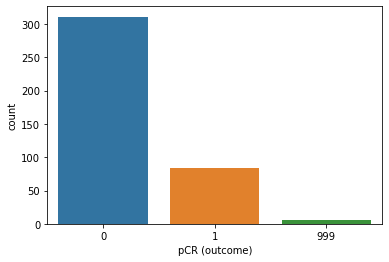

In [7]:
sns.countplot(x="pCR (outcome)", data=all_df)#Visualisation

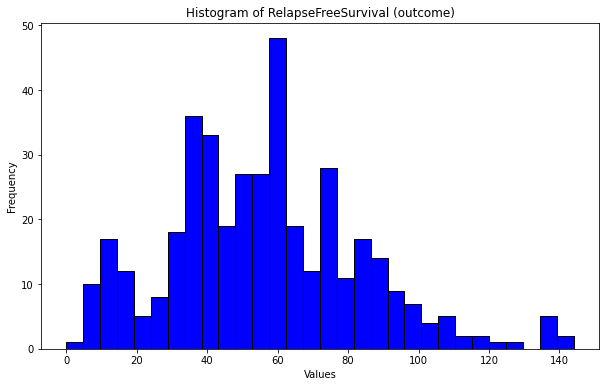

Number of unique values: 144


In [8]:
#Regression target
plt.figure(figsize=(10, 6))
plt.hist(all_df['RelapseFreeSurvival (outcome)'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of RelapseFreeSurvival (outcome)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()
print("Number of unique values:",all_df['RelapseFreeSurvival (outcome)'].nunique())

In [9]:
#Checking missing values
missing_values = all_df.isnull().sum()
print(missing_values)
columns_with_missing_values = missing_values[missing_values > 0]

if not columns_with_missing_values.empty:
    print("Columns with missing values:")
    print(columns_with_missing_values)
else:
    print("No missing values in any column.")

pCR (outcome)                    0
RelapseFreeSurvival (outcome)    0
Age                              0
ER                               0
PgR                              0
                                ..
original_ngtdm_Busyness          0
original_ngtdm_Coarseness        0
original_ngtdm_Complexity        0
original_ngtdm_Contrast          0
original_ngtdm_Strength          0
Length: 119, dtype: int64
No missing values in any column.


In [10]:
all_df.shape

(400, 119)

In [11]:
# Remove rows containing the value 999 in any column
df1 = all_df[~all_df.isin([999]).any(axis=1)]
# Resetting the index
df1.reset_index(drop=True, inplace=True)
df1

pCR (outcome)  RelapseFreeSurvival (outcome)   Age  ER  PgR  HER2  \
0                1                     144.000000  41.0   0    0     0   
1                0                     142.000000  39.0   1    1     0   
2                1                     135.000000  31.0   0    0     0   
3                0                      12.000000  35.0   0    0     0   
4                0                     109.000000  61.0   1    0     0   
..             ...                            ...   ...  ..  ...   ...   
385              0                      54.500000  58.5   1    0     1   
386              0                      49.250000  34.3   0    0     0   
387              0                      48.500000  53.3   0    0     0   
388              0                      47.500000  68.8   1    0     0   
389              0                      46.916667  46.0   1    0     0   

     TrippleNegative  ChemoGrade  Proliferation  HistologyType  ...  \
0                  1           3              3              1  ...   
1                  0           3              3              1  ...   
2                  1           2              1              1  ...   
3                  1           3              3              1  ...   
4                  0           2              1              1  ...   
..               ...         ...            ...            ...  ...   
385                0           3              2              1  ...   
386                1           3              3              1  ...   
387                1           2              1              1  ...   
388                0           3              3              1  ...   
389                0           2              1              1  ...   

     original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                         0.517172   
1                                         0.444391   
2                                         0.534549   
3                                         0.506185   
4                                         0.462282   
..                                             ...   
385                                       0.476493   
386                                       0.418382   
387                                       0.527779   
388                                       0.313693   
389                                       0.670229   

     original_glszm_SmallAreaLowGrayLevelEmphasis  original_glszm_ZoneEntropy  \
0                                        0.375126                    3.325332   
1                                        0.444391                    3.032144   
2                                        0.534549                    2.485848   
3                                        0.506185                    2.606255   
4                                        0.462282                    2.809279   
..                                            ...                         ...   
385                                      0.476493                    2.453583   
386                                      0.418382                    2.995603   
387                                      0.527778                    1.500000   
388                                      0.313693                    3.573557   
389                                      0.670229                    1.857045   

     original_glszm_ZonePercentage  original_glszm_ZoneVariance  \
0                         0.002314                 3.880772e+06   
1                         0.005612                 2.372010e+06   
2                         0.006752                 1.540027e+06   
3                         0.003755                 6.936741e+06   
4                         0.006521                 1.265399e+06   
..                             ...                          ...   
385                       0.003229                 2.327038e+06   
386                       0.004243                 1.005061e+06   
387                       0.003728    

In [12]:
df1.shape

(390, 119)

In [13]:
#Rounding Regression target and Age columns
df1.loc[:, 'RelapseFreeSurvival (outcome)'] = df1['RelapseFreeSurvival (outcome)'].round().astype(int)
#df1['RelapseFreeSurvival (outcome)'] = df1['RelapseFreeSurvival (outcome)'].round().astype(int)
df1.loc[:, 'Age'] = df1['Age'].round().astype(int)
#df1['Age'] = df1['Age'].round().astype(int)
df1

/var/folders/jt/l6vb49ld2m5fdmm0xf1hs_t00000gn/T/ipykernel_48555/210383480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'RelapseFreeSurvival (outcome)'] = df1['RelapseFreeSurvival (outcome)'].round().astype(int)
/var/folders/jt/l6vb49ld2m5fdmm0xf1hs_t00000gn/T/ipykernel_48555/210383480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'Age'] = df1['Age'].round().astype(int)


pCR (outcome)  RelapseFreeSurvival (outcome)  Age  ER  PgR  HER2  \
0                1                            144   41   0    0     0   
1                0                            142   39   1    1     0   
2                1                            135   31   0    0     0   
3                0                             12   35   0    0     0   
4                0                            109   61   1    0     0   
..             ...                            ...  ...  ..  ...   ...   
385              0                             54   58   1    0     1   
386              0                             49   34   0    0     0   
387              0                             48   53   0    0     0   
388              0                             48   69   1    0     0   
389              0                             47   46   1    0     0   

     TrippleNegative  ChemoGrade  Proliferation  HistologyType  ...  \
0                  1           3              3              1  ...   
1                  0           3              3              1  ...   
2                  1           2              1              1  ...   
3                  1           3              3              1  ...   
4                  0           2              1              1  ...   
..               ...         ...            ...            ...  ...   
385                0           3              2              1  ...   
386                1           3              3              1  ...   
387                1           2              1              1  ...   
388                0           3              3              1  ...   
389                0           2              1              1  ...   

     original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                         0.517172   
1                                         0.444391   
2                                         0.534549   
3                                         0.506185   
4                                         0.462282   
..                                             ...   
385                                       0.476493   
386                                       0.418382   
387                                       0.527779   
388                                       0.313693   
389                                       0.670229   

     original_glszm_SmallAreaLowGrayLevelEmphasis  original_glszm_ZoneEntropy  \
0                                        0.375126                    3.325332   
1                                        0.444391                    3.032144   
2                                        0.534549                    2.485848   
3                                        0.506185                    2.606255   
4                                        0.462282                    2.809279   
..                                            ...                         ...   
385                                      0.476493                    2.453583   
386                                      0.418382                    2.995603   
387                                      0.527778                    1.500000   
388                                      0.313693                    3.573557   
389                                      0.670229                    1.857045   

     original_glszm_ZonePercentage  original_glszm_ZoneVariance  \
0                         0.002314                 3.880772e+06   
1                         0.005612                 2.372010e+06   
2                         0.006752                 1.540027e+06   
3                         0.003755                 6.936741e+06   
4                         0.006521                 1.265399e+06   
..                             ...                          ...   
385                       0.003229                 2.327038e+06   
386                       0.004243                 1.005061e+06   
387                       0.003728                

In [14]:
df1.shape

(390, 119)

In [15]:
column_types = df1.iloc[:, :12].dtypes
print(column_types)

pCR (outcome)                    int64
RelapseFreeSurvival (outcome)    int64
Age                              int64
ER                               int64
PgR                              int64
HER2                             int64
TrippleNegative                  int64
ChemoGrade                       int64
Proliferation                    int64
HistologyType                    int64
LNStatus                         int64
TumourStage                      int64
dtype: object


In [16]:
X=df1.drop(['pCR (outcome)','RelapseFreeSurvival (outcome)'],axis=1)

In [17]:
X
X.shape

(390, 117)

## Getting the MRI features

In [18]:
Xmri=X.iloc[:,10:]

In [19]:
Xmri

original_shape_Elongation  original_shape_Flatness  \
0                     0.813912                 0.724080   
1                     0.666118                 0.476173   
2                     0.645083                 0.594470   
3                     0.770842                 0.501228   
4                     0.861035                 0.750267   
..                         ...                      ...   
385                   0.389439                 0.270888   
386                   0.915643                 0.726601   
387                   0.657236                 0.447210   
388                   0.890276                 0.837452   
389                   0.464971                 0.396526   

     original_shape_LeastAxisLength  original_shape_MajorAxisLength  \
0                         23.781937                       32.844370   
1                         20.715461                       43.504095   
2                         21.659822                       36.435505   
3                         26.590504                       53.050724   
4                         20.456571                       27.265716   
..                              ...                             ...   
385                       13.993705                       51.658584   
386                       18.563747                       25.548740   
387                        8.413409                       18.813092   
388                       31.501627                       37.616059   
389                       14.620703                       36.872027   

     original_shape_Maximum2DDiameterColumn  \
0                                 37.696154   
1                                 51.971146   
2                                 32.984845   
3                                 66.910388   
4                                 33.241540   
..                                      ...   
385                               48.093659   
386                               31.016125   
387                               17.117243   
388                               42.059482   
389                               30.463092   

     original_shape_Maximum2DDiameterRow  \
0                              38.626416   
1                              41.761226   
2                              40.447497   
3                              44.944410   
4                              30.594117   
..                                   ...   
385                            23.323808   
386                            29.681644   
387                            16.643317   
388                            43.657760   
389                            28.792360   

     original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                34.713110                         39.572718   
1                                36.400549                         53.310412   
2                                42.379240                         44.384682   
3                                66.760767                         69.000000   
4                                31.384710                         35.042831   
..                                     ...                               ...   
385                              56.885851                         58.120564   
386                              32.572995                         35.227830   
387                              18.384776                         24.535688   
388                              45.607017                         45.836667   
389                              30.413813                         39.874804   

     original_shape_MeshVolume  original_shape_MinorAxisLength  ...  \
0                 14209.458330                       26.732440  ...   
1                 14202.708330                       28.978871  ...   
2                 10858.375000                       23.503921  ...   
3                 26748.208330                       40.893735  ...   
4                  8846.541667   

<Figure size 864x576 with 0 Axes>

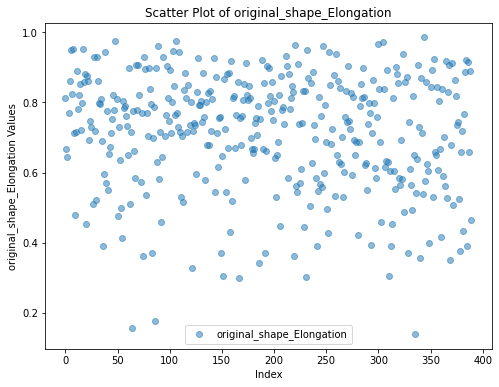

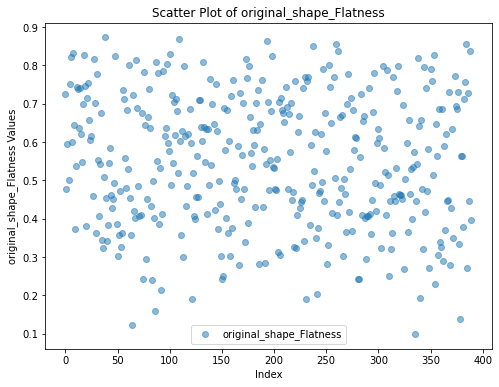

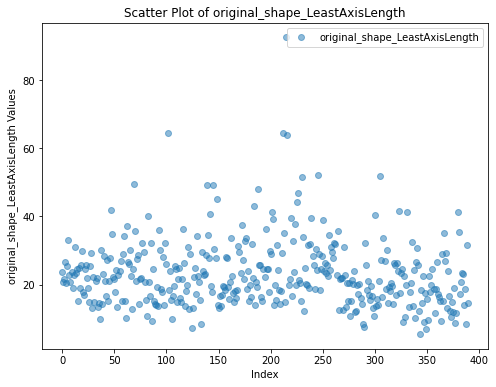

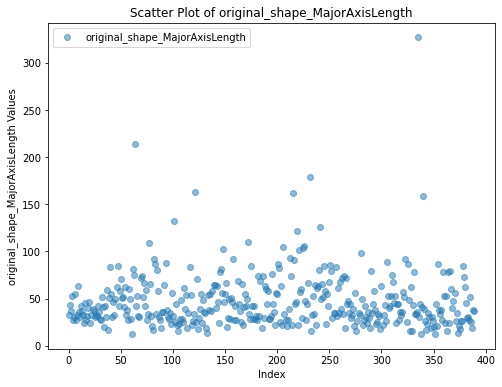

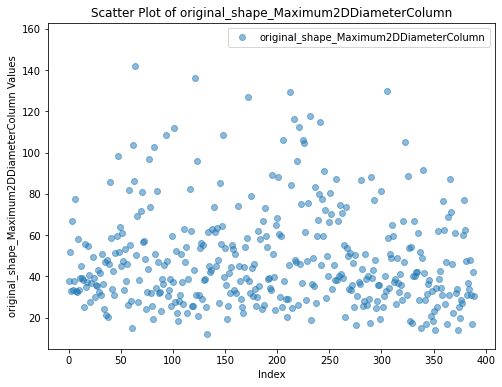

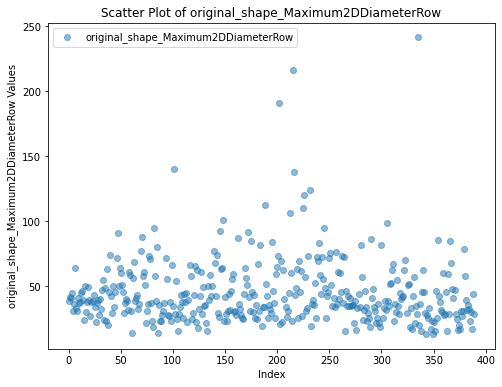

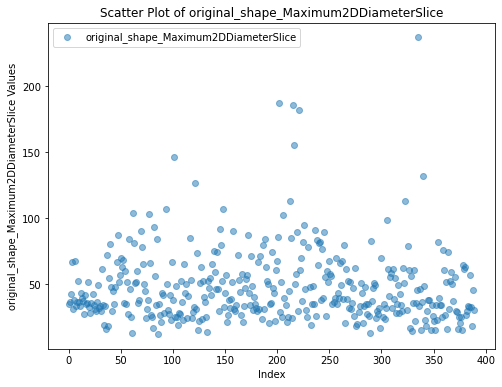

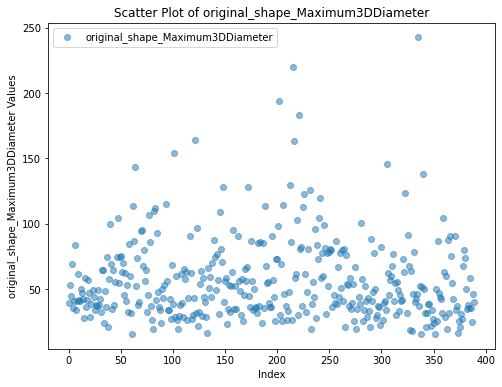

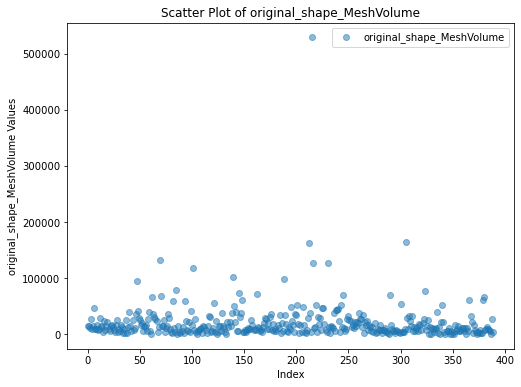

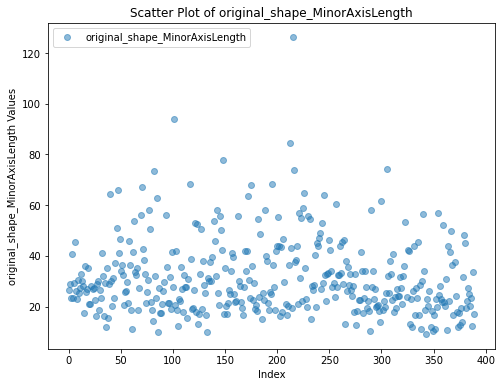

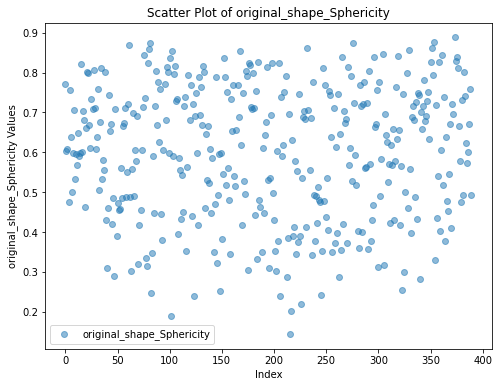

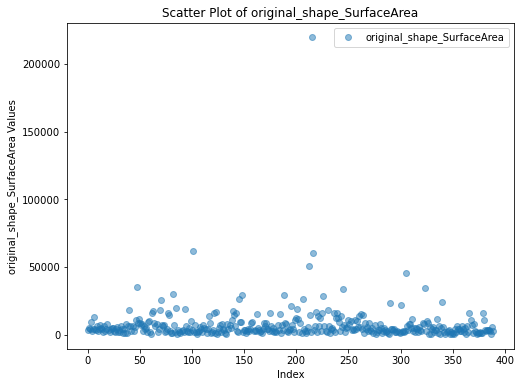

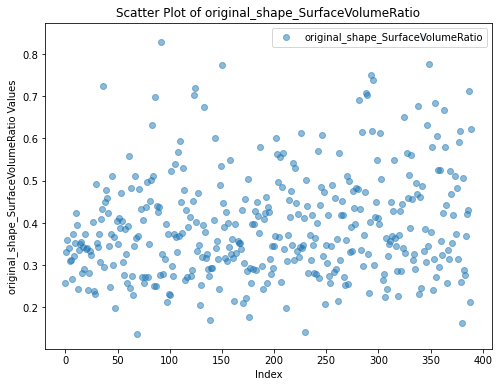

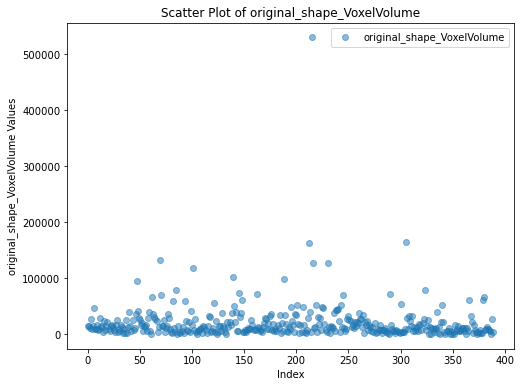

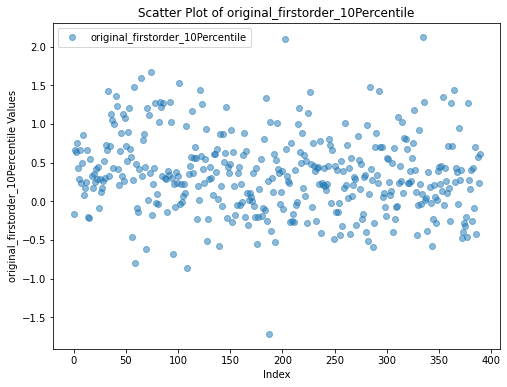

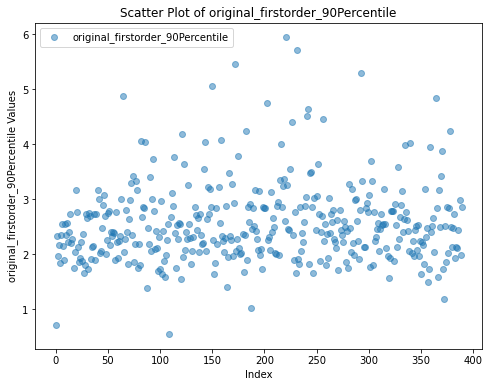

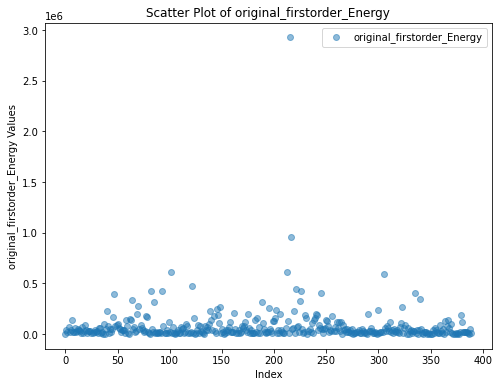

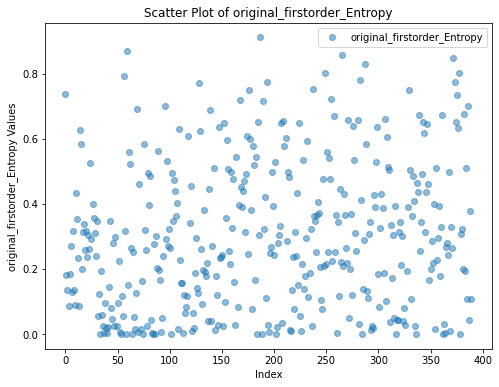

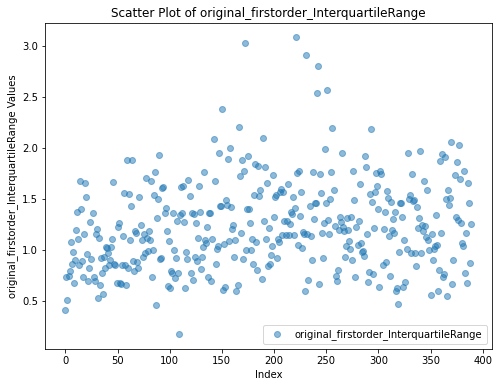

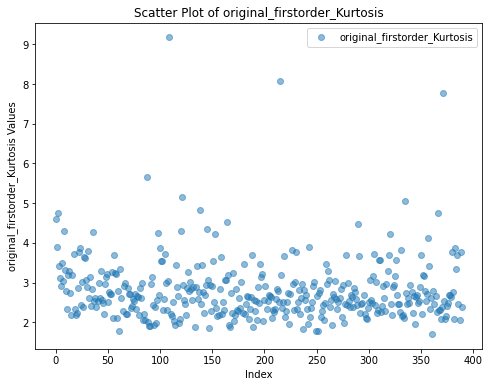

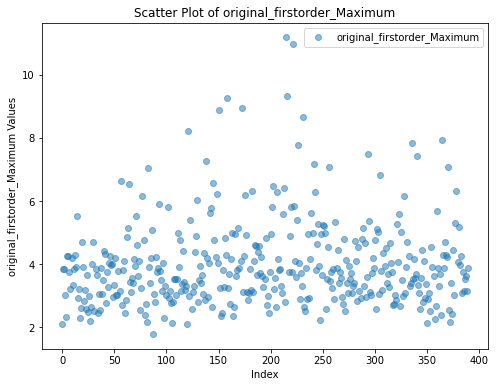

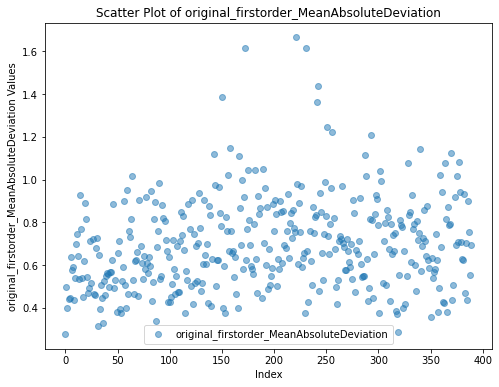

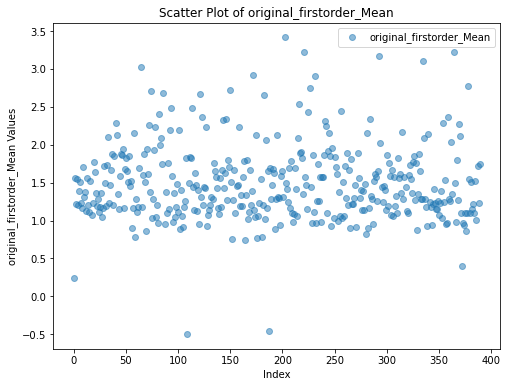

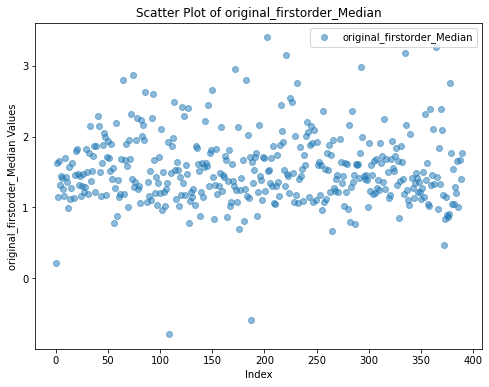

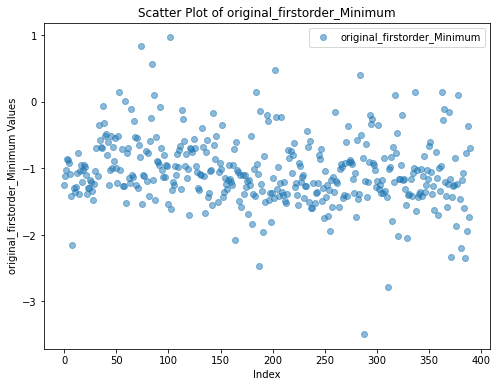

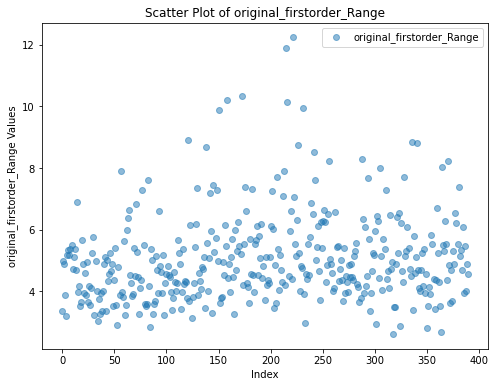

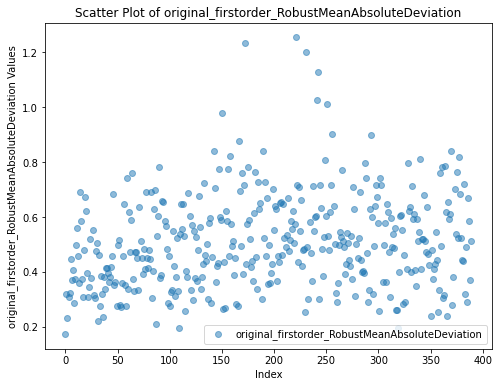

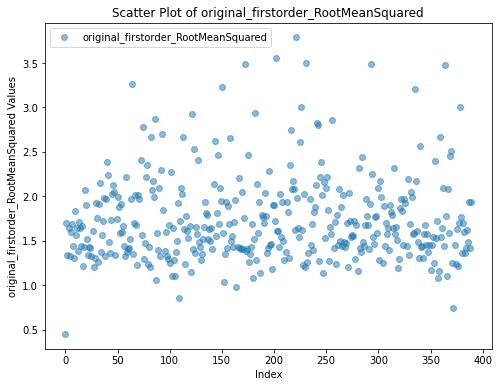

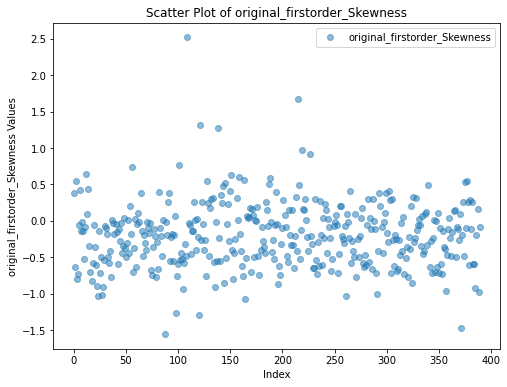

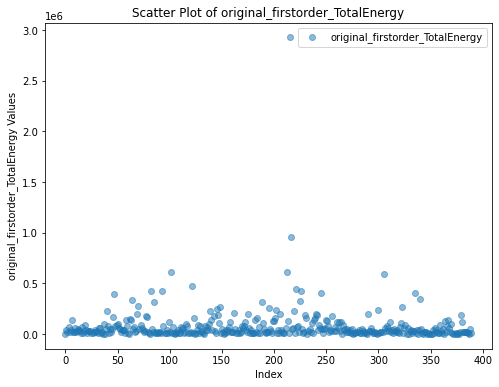

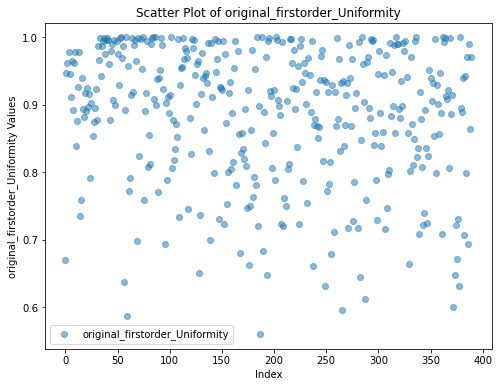

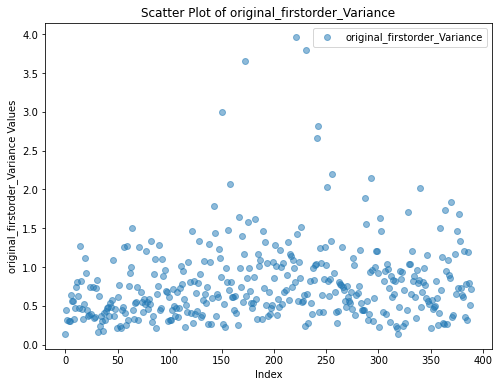

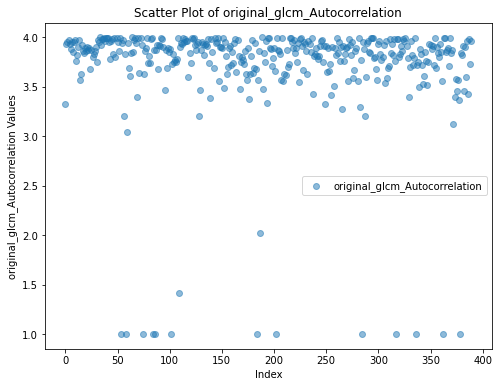

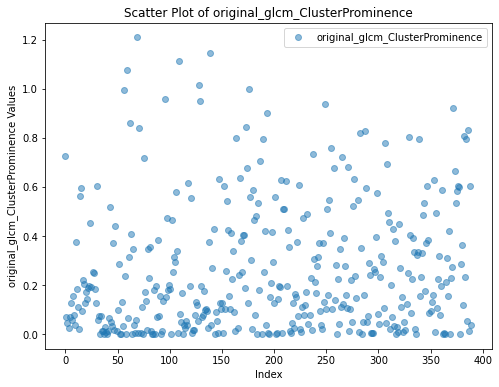

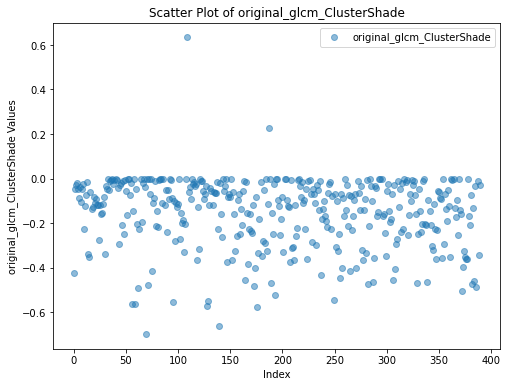

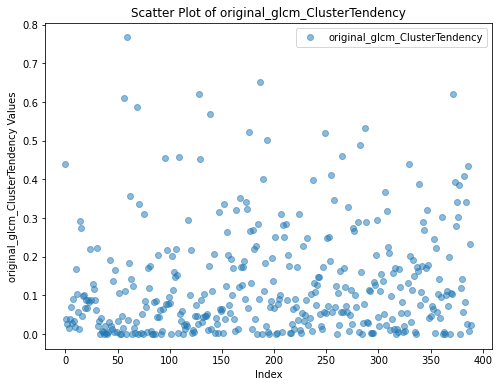

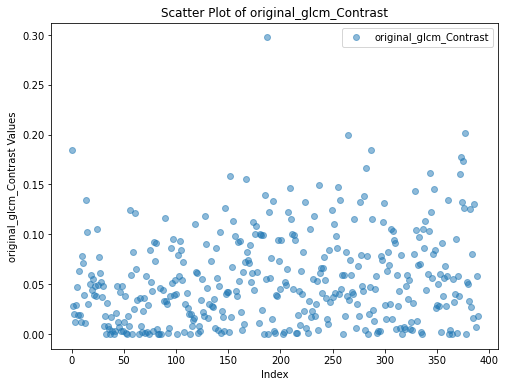

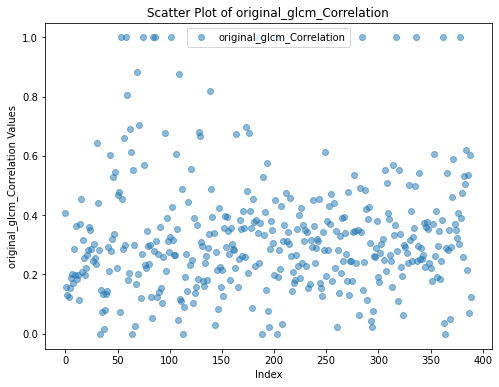

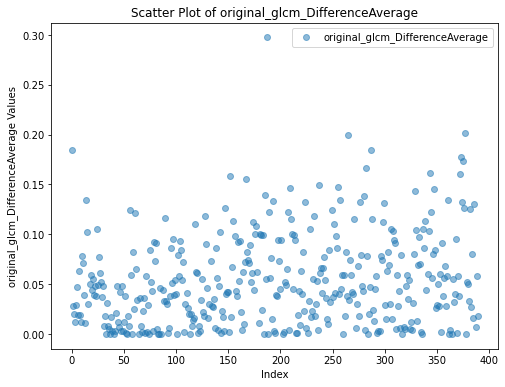

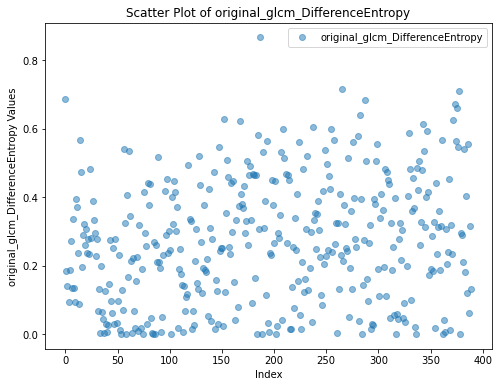

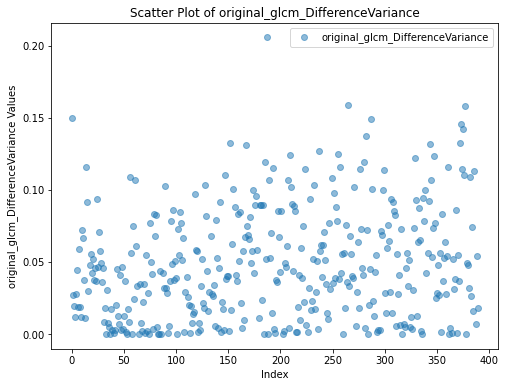

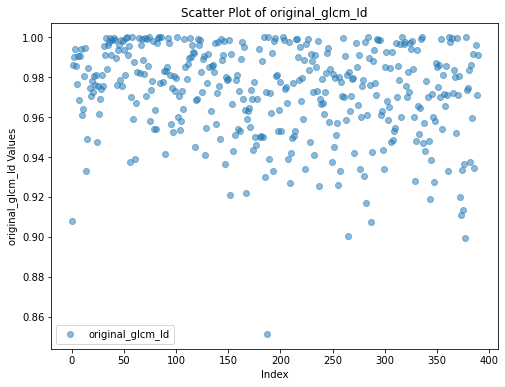

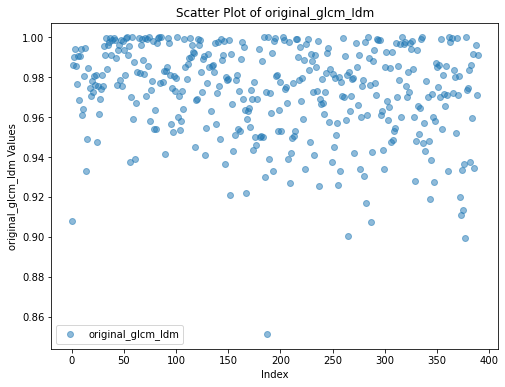

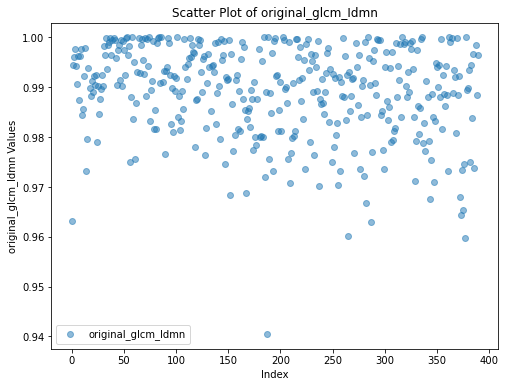

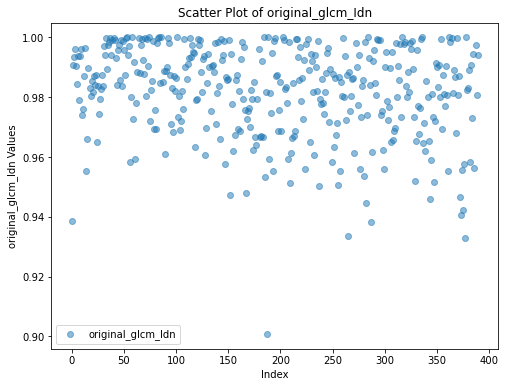

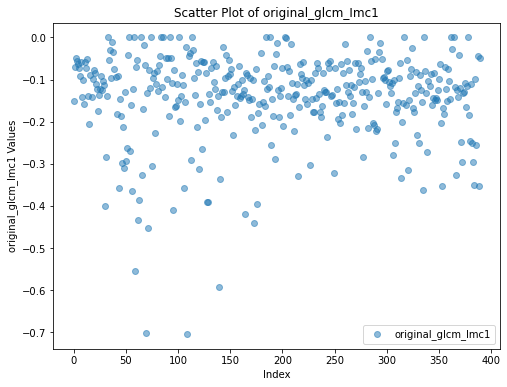

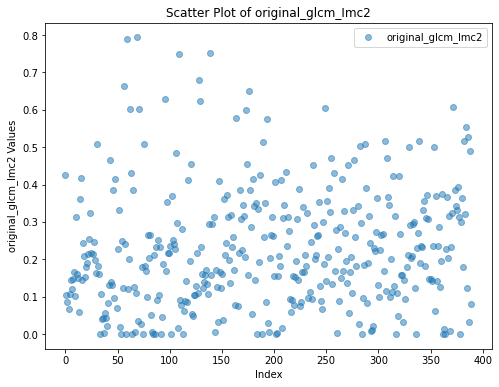

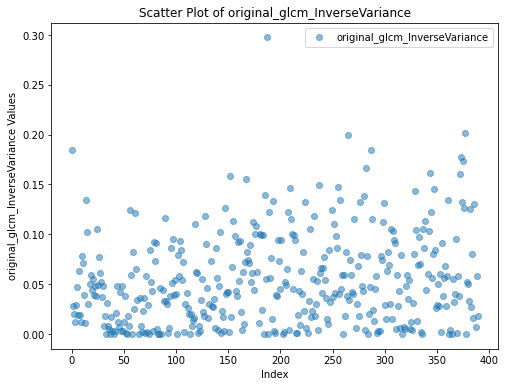

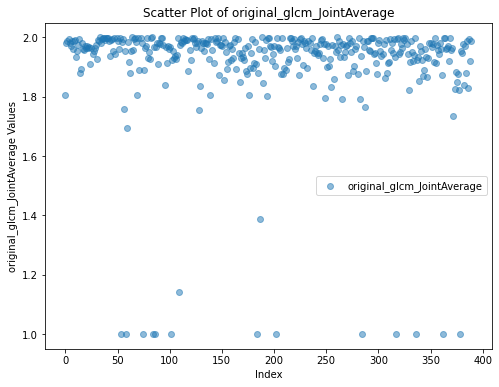

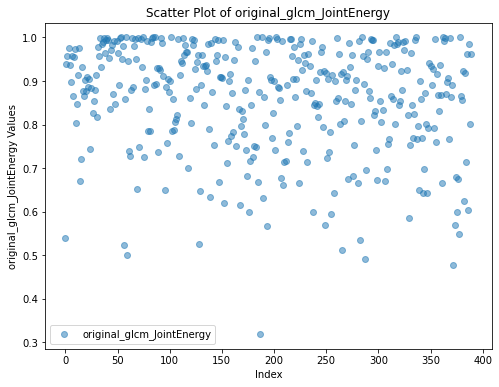

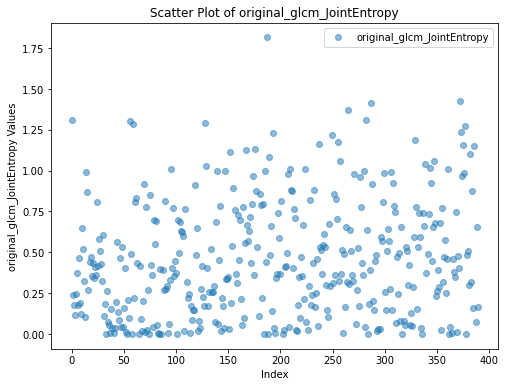

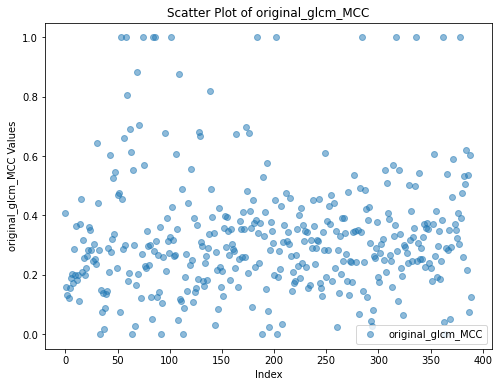

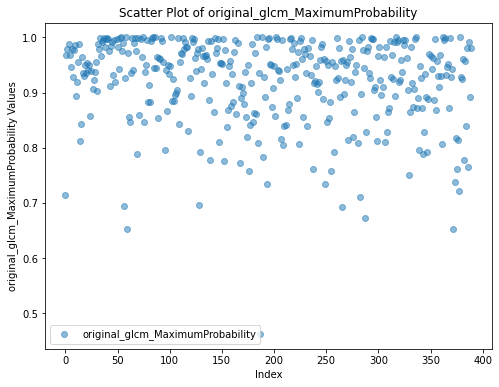

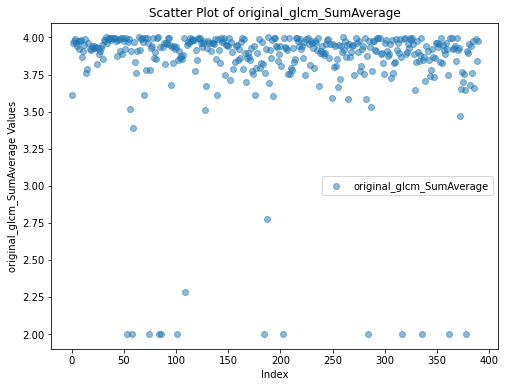

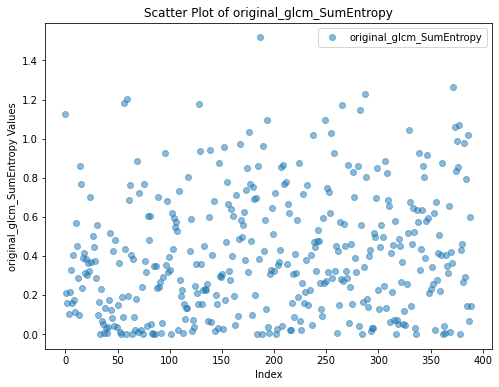

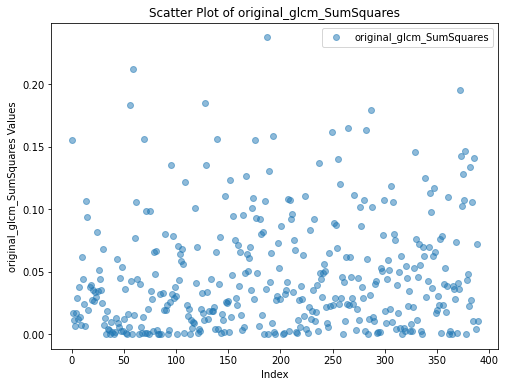

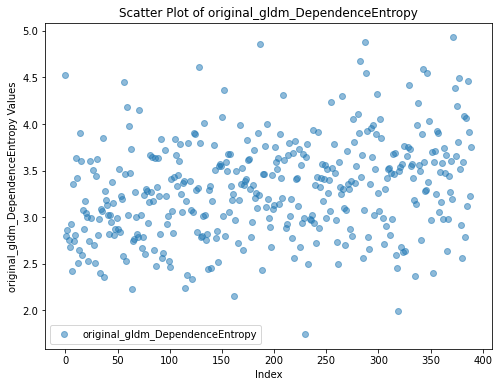

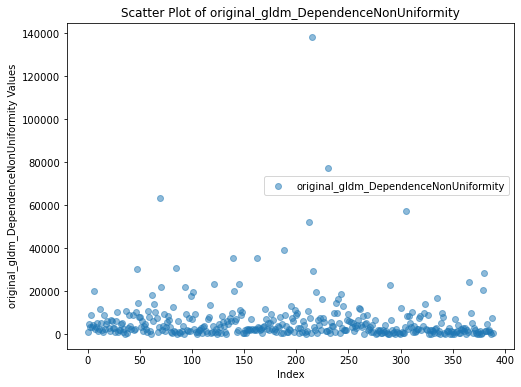

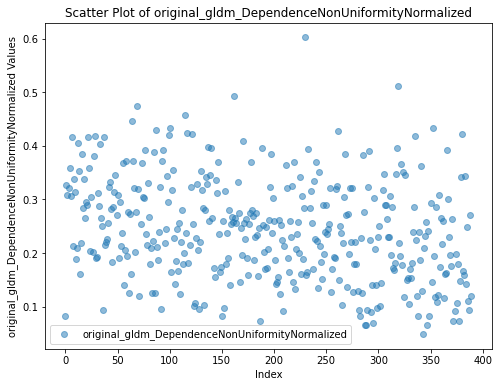

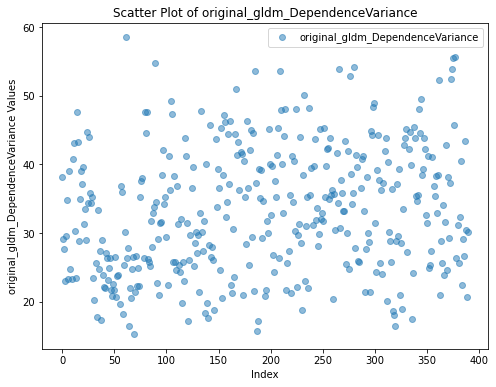

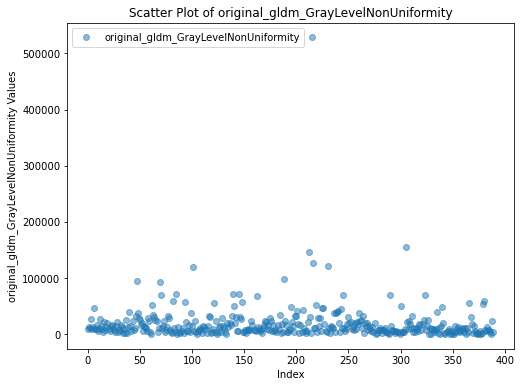

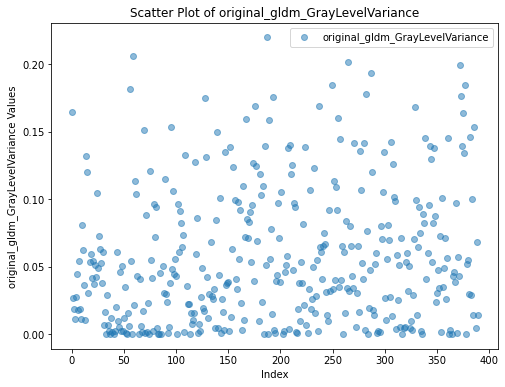

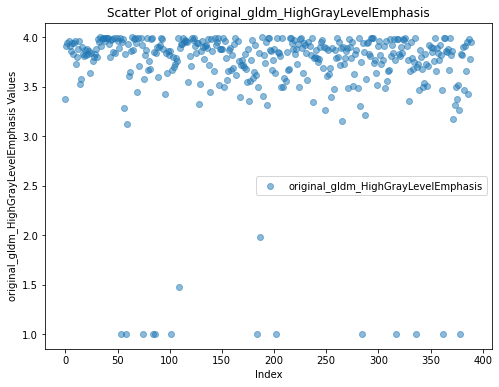

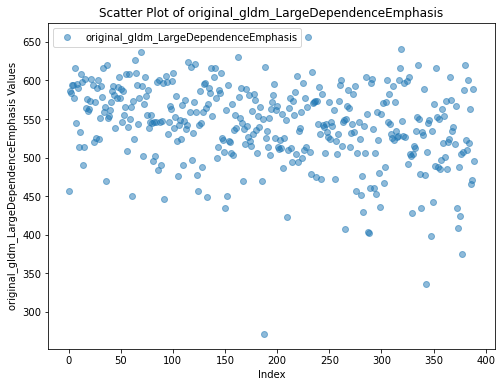

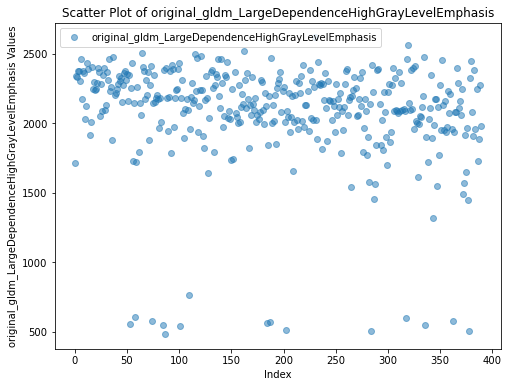

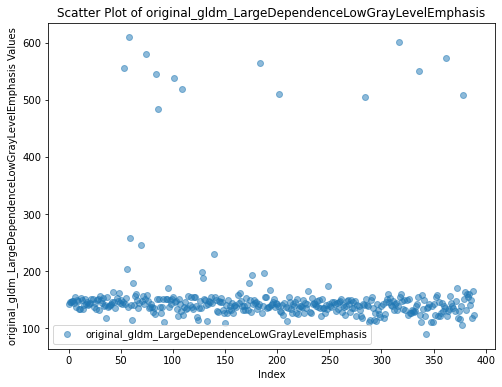

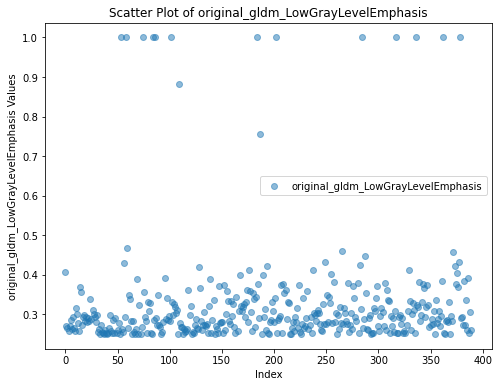

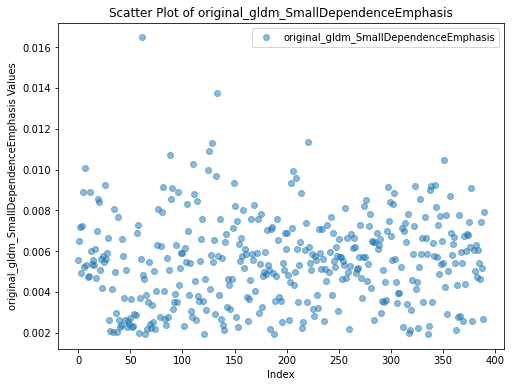

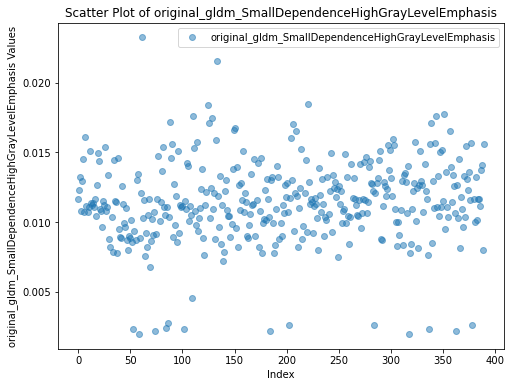

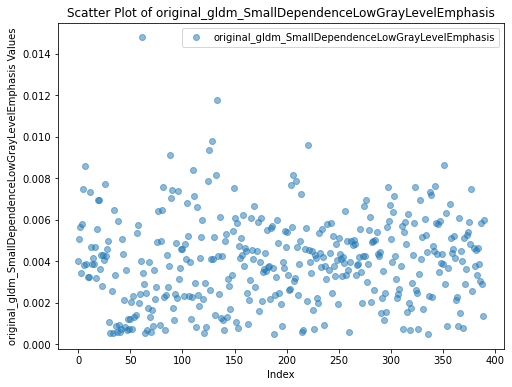

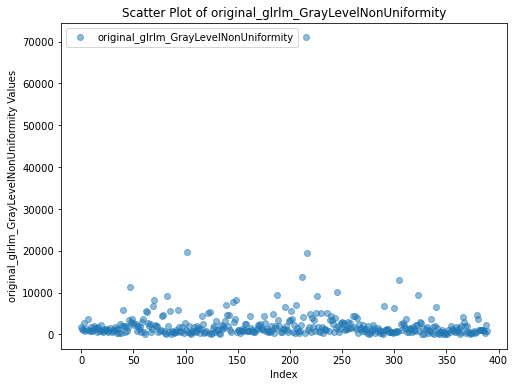

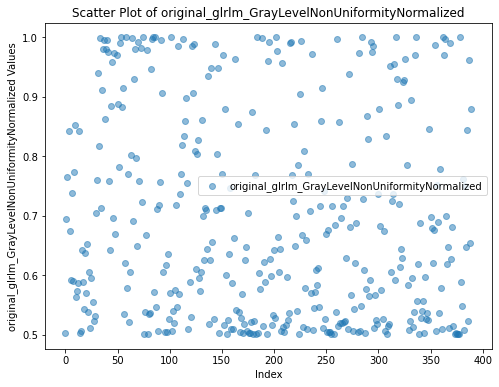

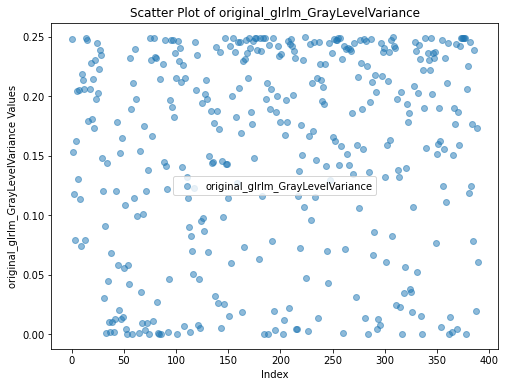

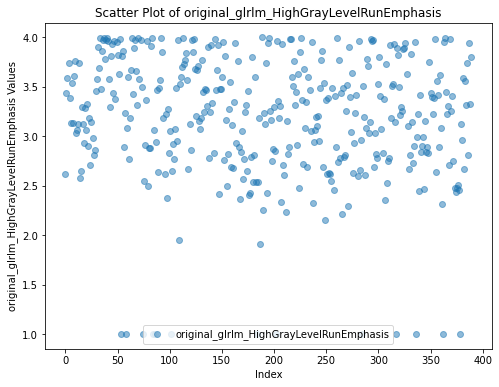

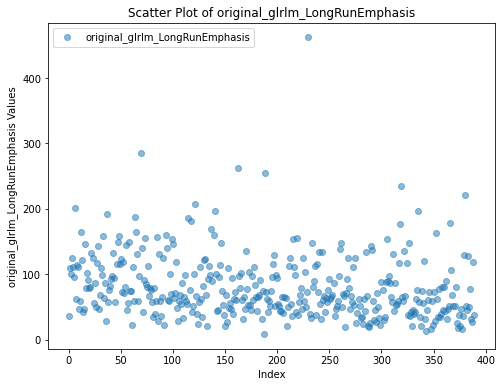

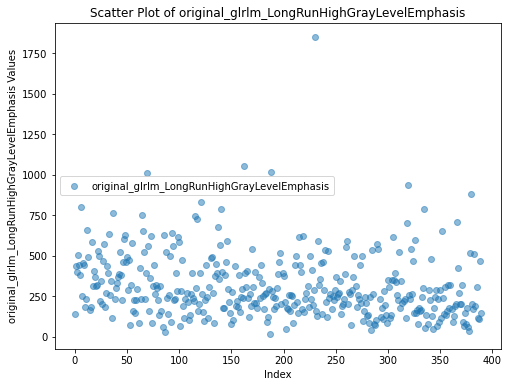

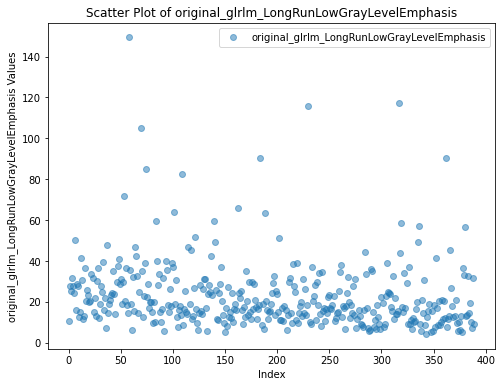

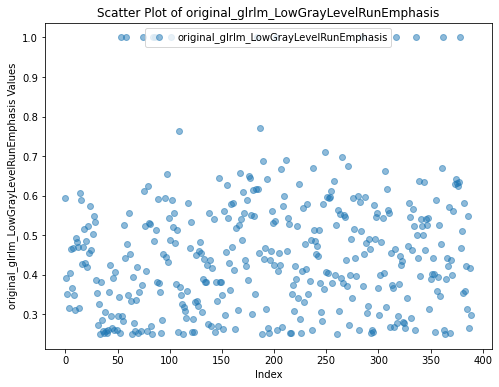

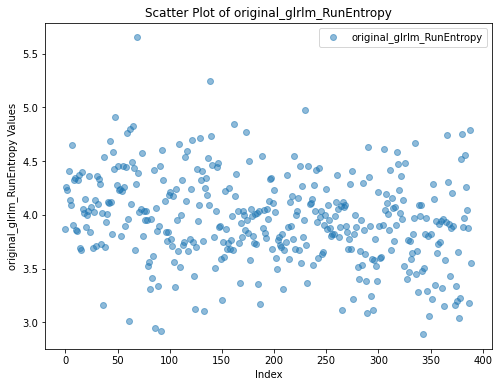

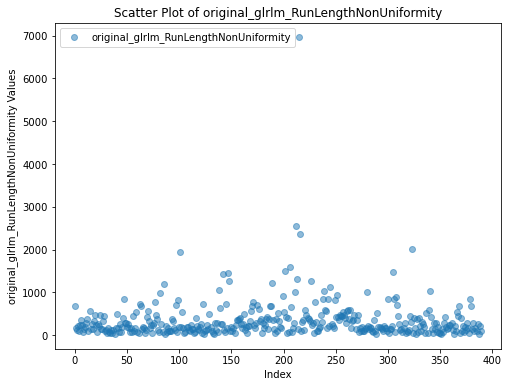

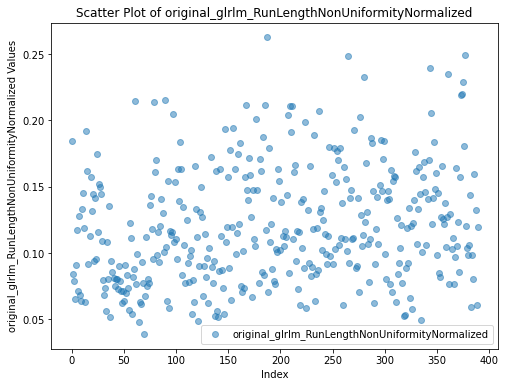

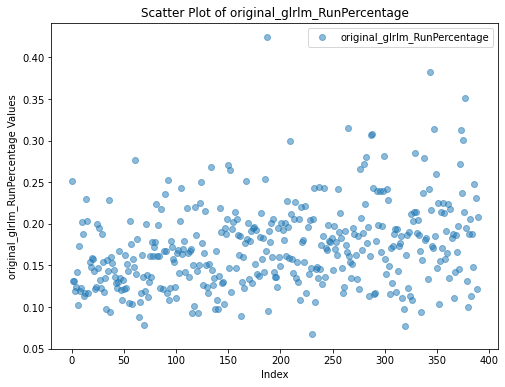

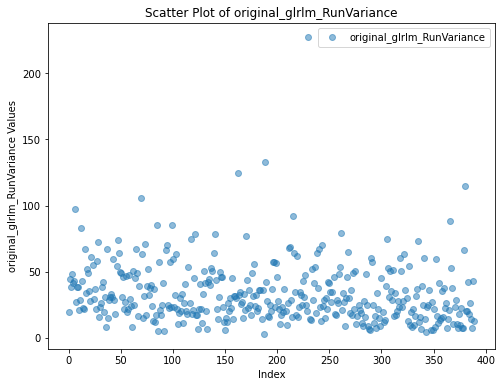

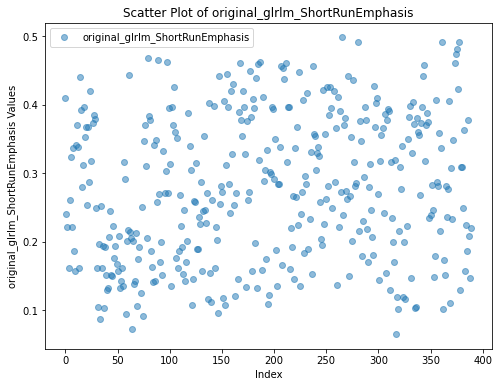

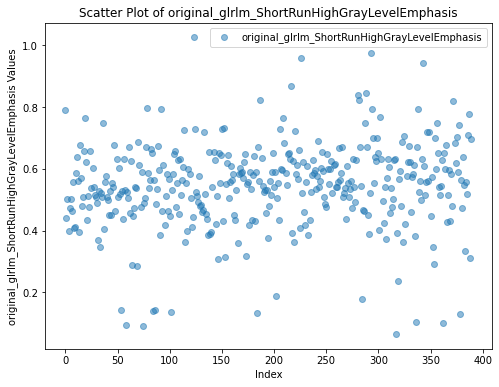

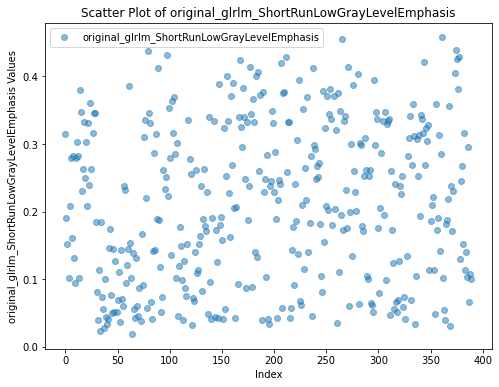

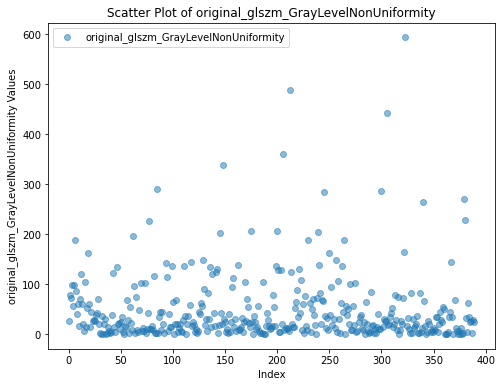

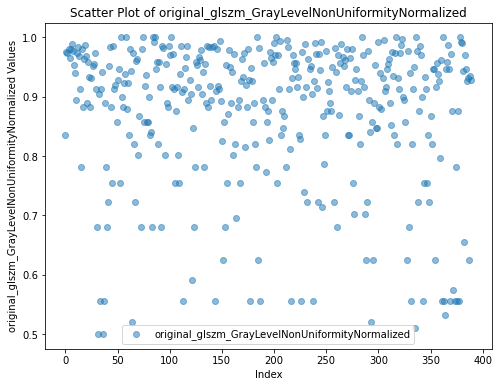

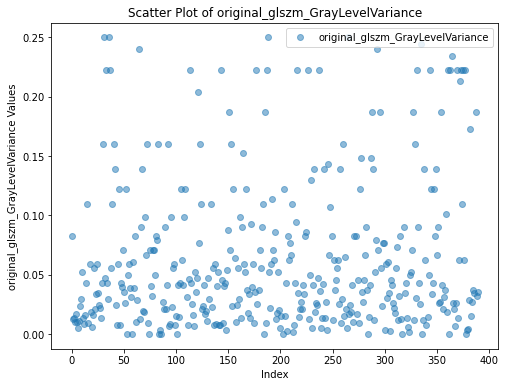

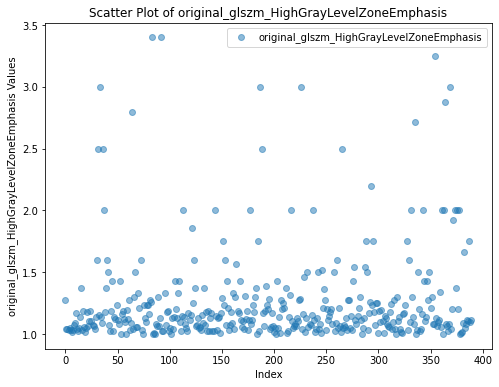

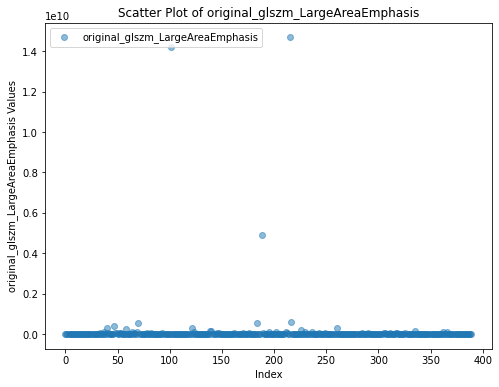

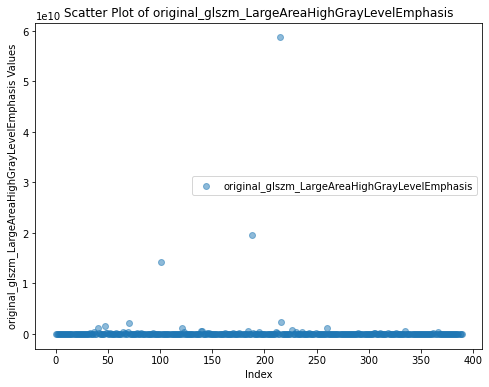

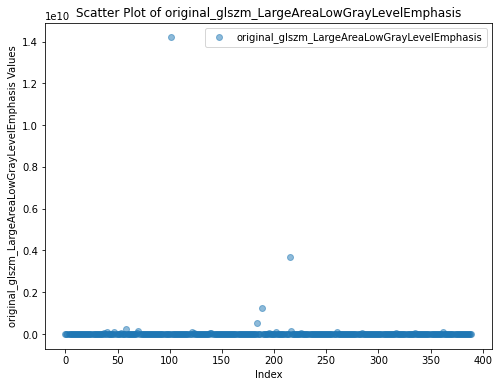

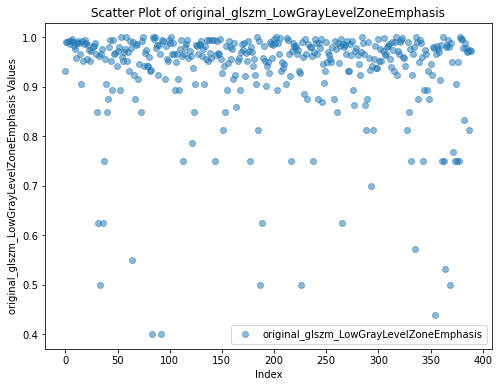

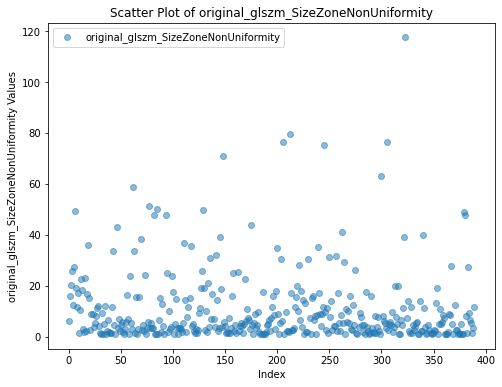

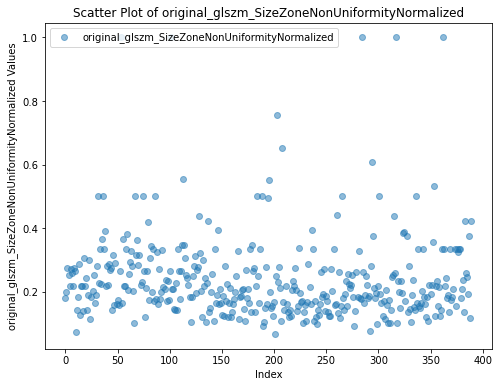

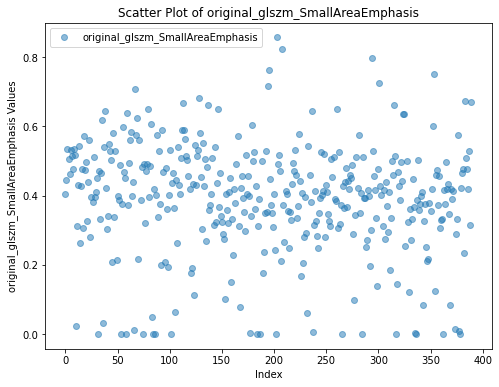

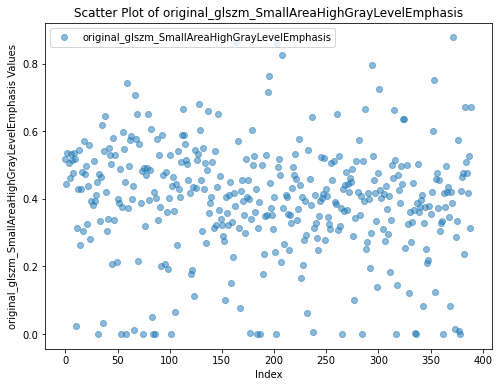

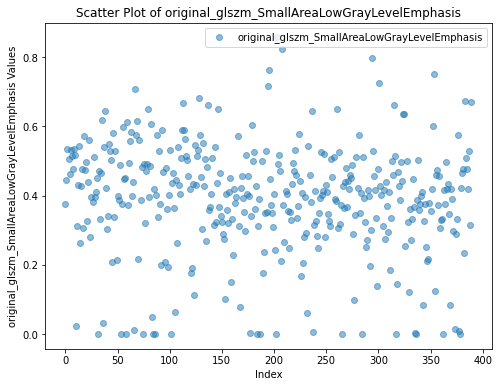

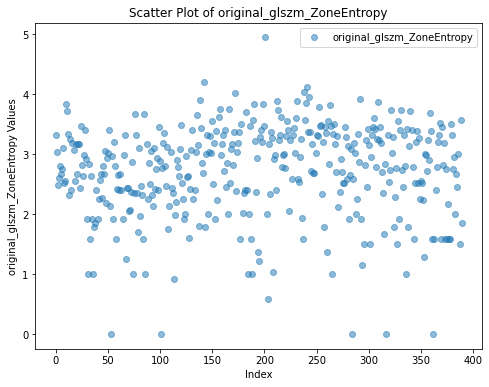

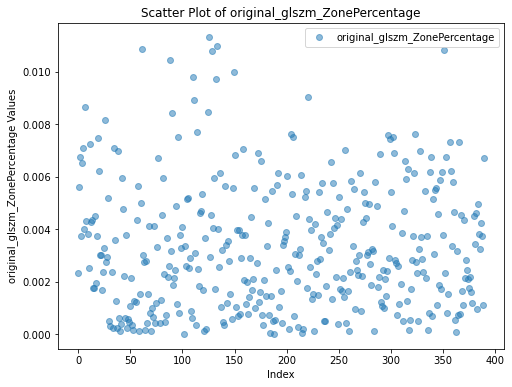

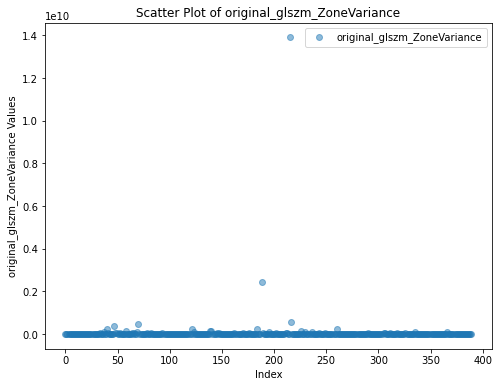

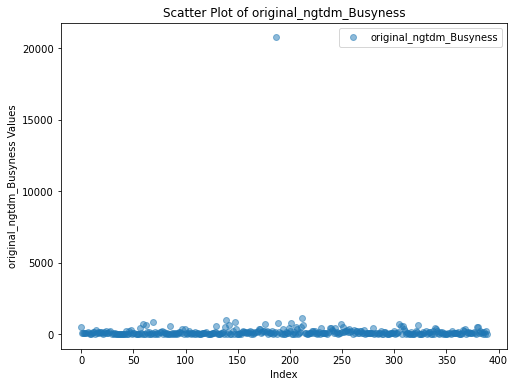

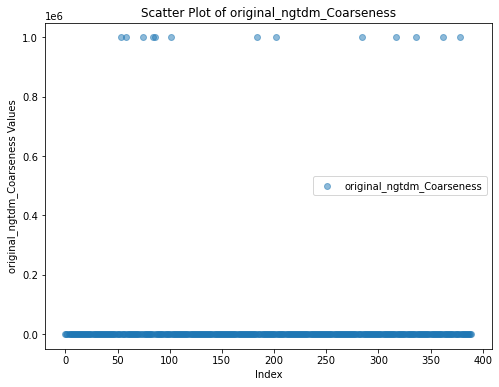

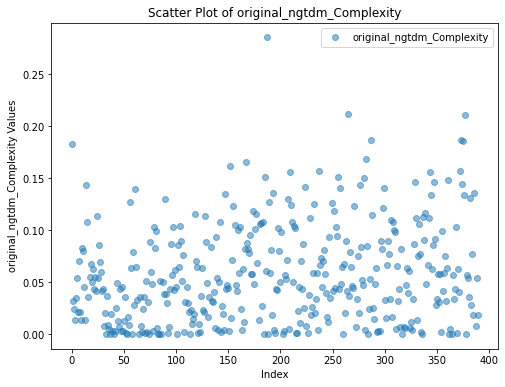

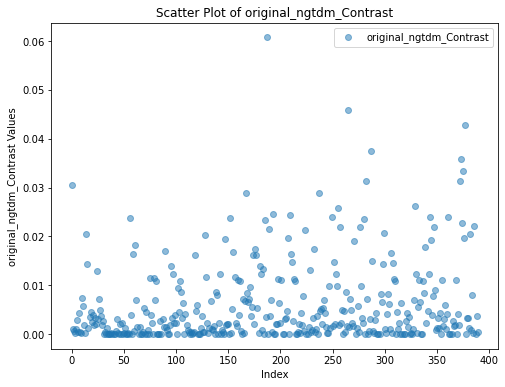

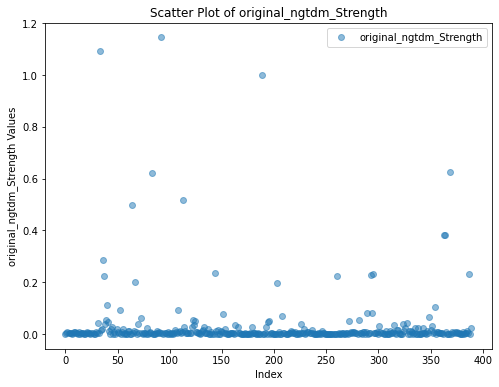

In [20]:
#Visualising to check if outliers exist in Xmri
plt.figure(figsize=(12, 8))

# Iterate through each column in the DataFrame
for column in Xmri.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(Xmri.index, Xmri[column], label=column, alpha=0.5)
    plt.title(f'Scatter Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(f'{column} Values')
    plt.legend()
    plt.show()


In [21]:
# Calculate Z-scores for each data point in Xmri
z_scores = zscore(Xmri)

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Create a mask identifying outliers
outlier_mask = np.abs(z_scores) > threshold

# Replacing outliers with the mean of the corresponding feature
Xmri_no_outliers = Xmri.copy()
Xmri_no_outliers[outlier_mask] = np.nan  # Replace outliers with NaN
Xmri_no_outliers = Xmri_no_outliers.fillna(Xmri.mean())  # Replace NaN with mean

# Now, Xmri_no_outliers contains the DataFrame with outliers replaced by the mean

In [22]:
Xmri_no_outliers

original_shape_Elongation  original_shape_Flatness  \
0                     0.813912                 0.724080   
1                     0.666118                 0.476173   
2                     0.645083                 0.594470   
3                     0.770842                 0.501228   
4                     0.861035                 0.750267   
..                         ...                      ...   
385                   0.389439                 0.270888   
386                   0.915643                 0.726601   
387                   0.657236                 0.447210   
388                   0.890276                 0.837452   
389                   0.464971                 0.396526   

     original_shape_LeastAxisLength  original_shape_MajorAxisLength  \
0                         23.781937                       32.844370   
1                         20.715461                       43.504095   
2                         21.659822                       36.435505   
3                         26.590504                       53.050724   
4                         20.456571                       27.265716   
..                              ...                             ...   
385                       13.993705                       51.658584   
386                       18.563747                       25.548740   
387                        8.413409                       18.813092   
388                       31.501627                       37.616059   
389                       14.620703                       36.872027   

     original_shape_Maximum2DDiameterColumn  \
0                                 37.696154   
1                                 51.971146   
2                                 32.984845   
3                                 66.910388   
4                                 33.241540   
..                                      ...   
385                               48.093659   
386                               31.016125   
387                               17.117243   
388                               42.059482   
389                               30.463092   

     original_shape_Maximum2DDiameterRow  \
0                              38.626416   
1                              41.761226   
2                              40.447497   
3                              44.944410   
4                              30.594117   
..                                   ...   
385                            23.323808   
386                            29.681644   
387                            16.643317   
388                            43.657760   
389                            28.792360   

     original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                34.713110                         39.572718   
1                                36.400549                         53.310412   
2                                42.379240                         44.384682   
3                                66.760767                         69.000000   
4                                31.384710                         35.042831   
..                                     ...                               ...   
385                              56.885851                         58.120564   
386                              32.572995                         35.227830   
387                              18.384776                         24.535688   
388                              45.607017                         45.836667   
389                              30.413813                         39.874804   

     original_shape_MeshVolume  original_shape_MinorAxisLength  ...  \
0                 14209.458330                       26.732440  ...   
1                 14202.708330                       28.978871  ...   
2                 10858.375000                       23.503921  ...   
3                 26748.208330                       40.893735  ...   
4                  8846.541667   

<Figure size 864x576 with 0 Axes>

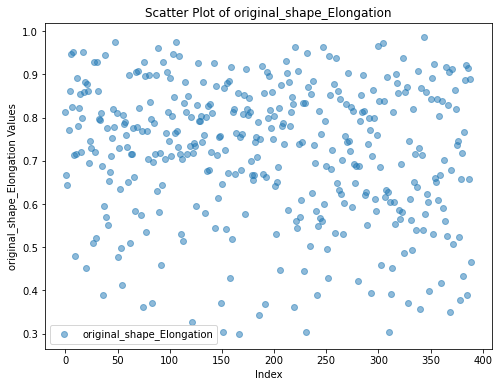

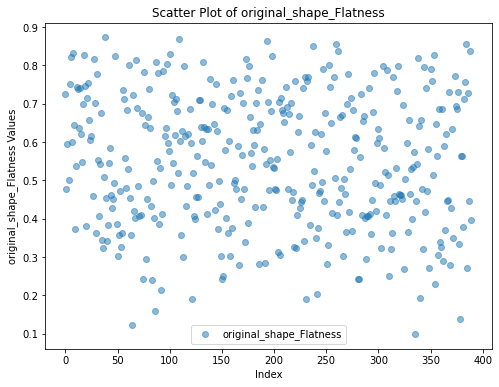

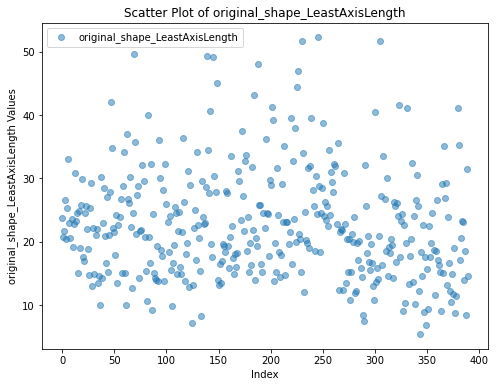

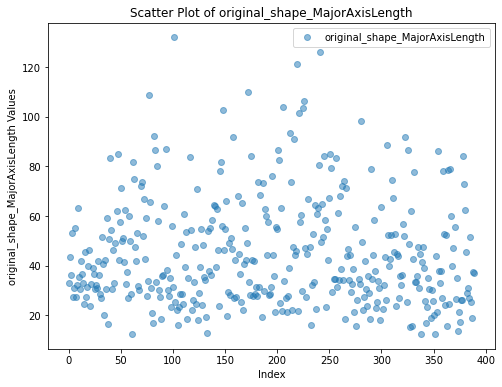

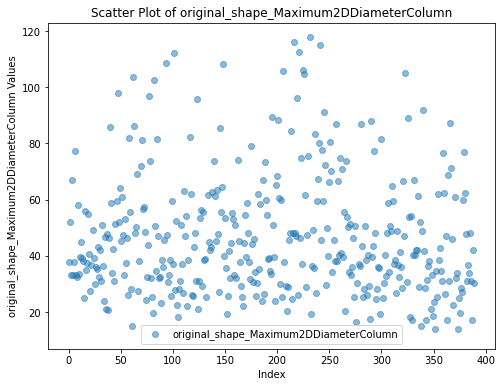

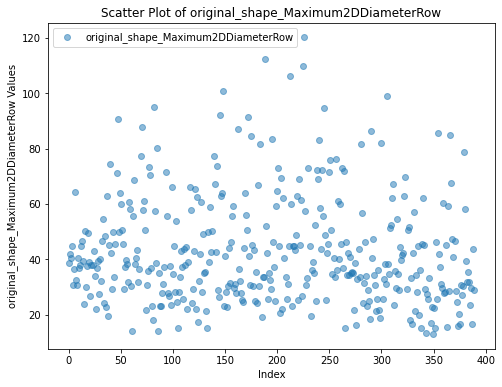

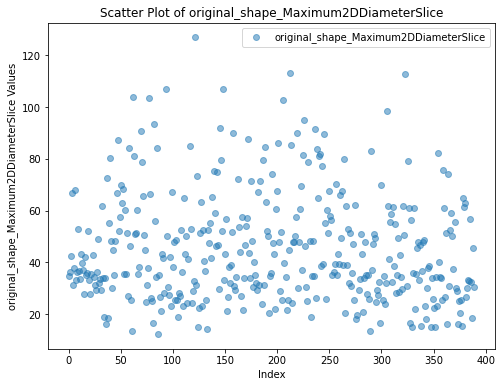

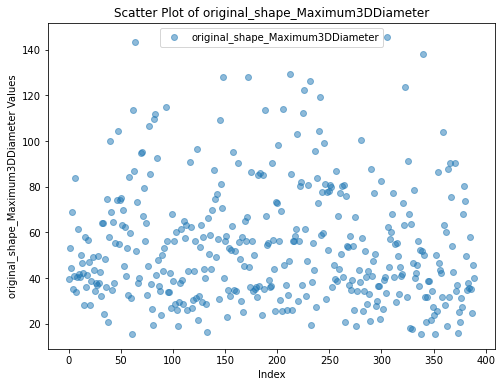

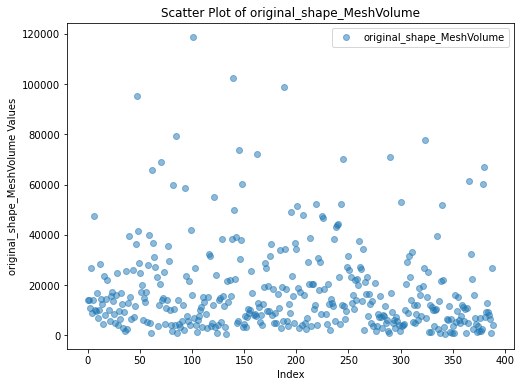

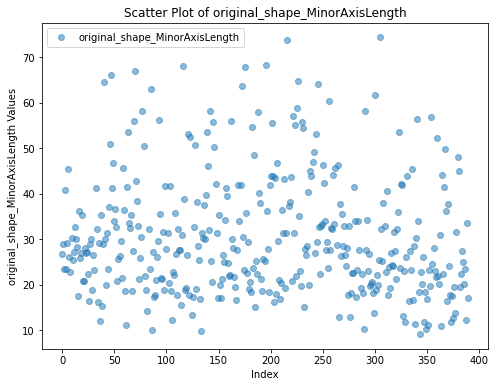

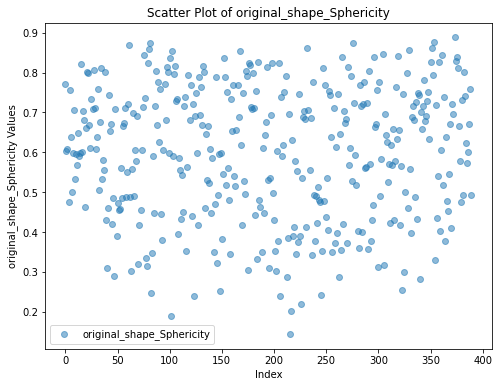

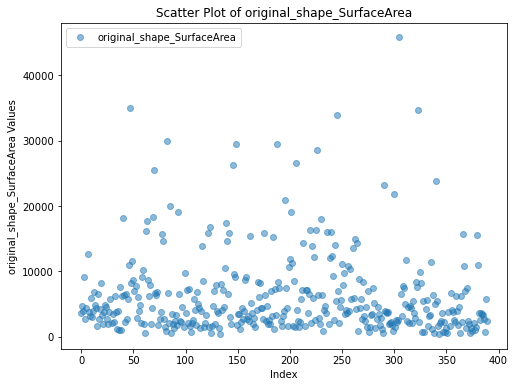

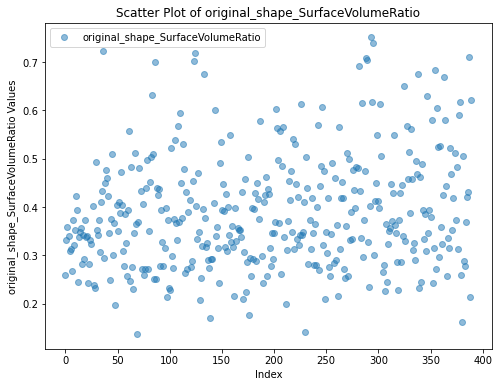

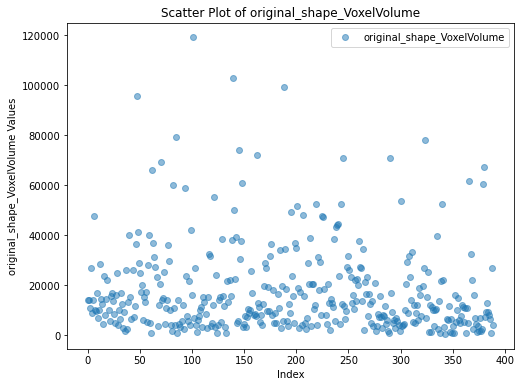

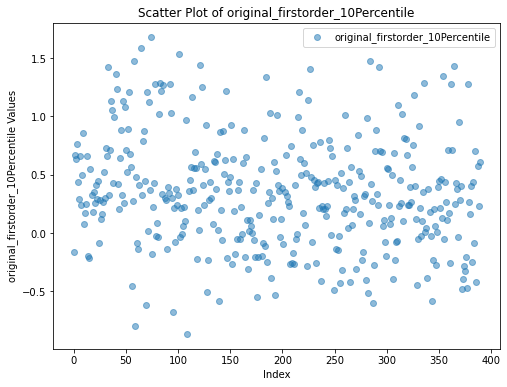

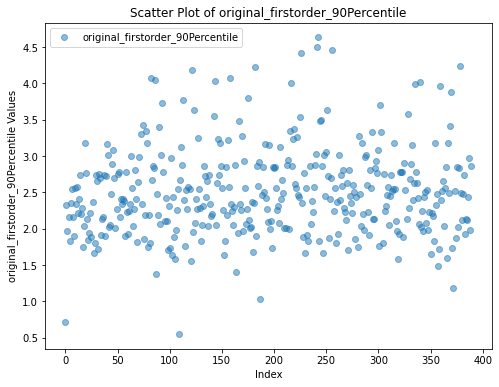

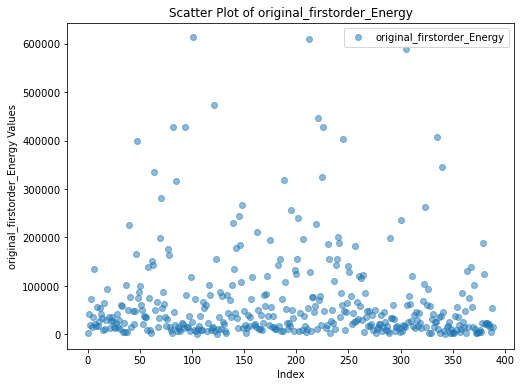

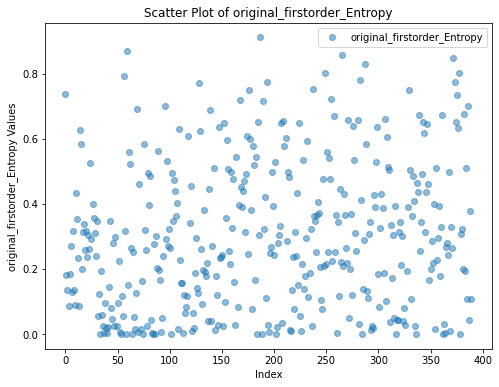

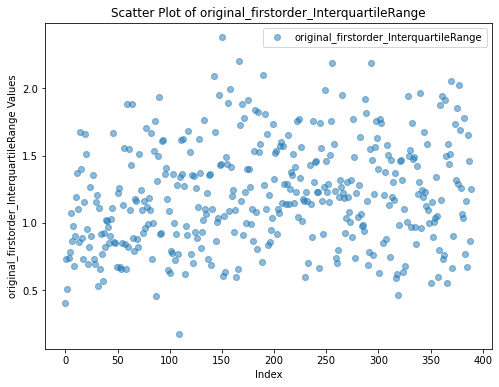

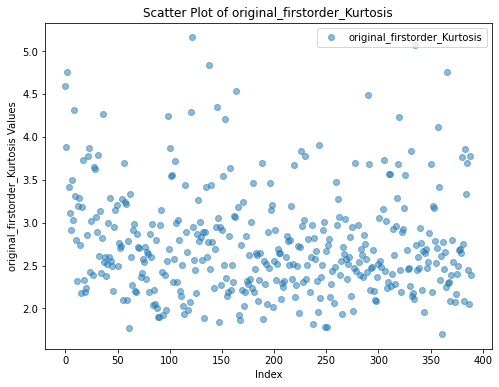

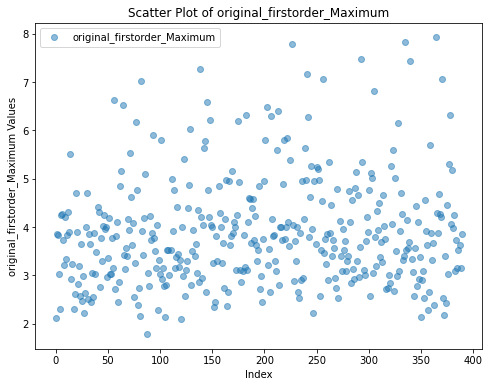

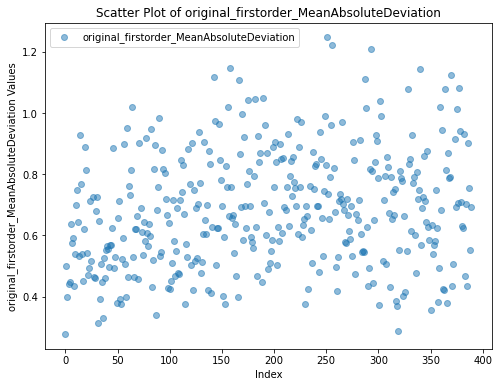

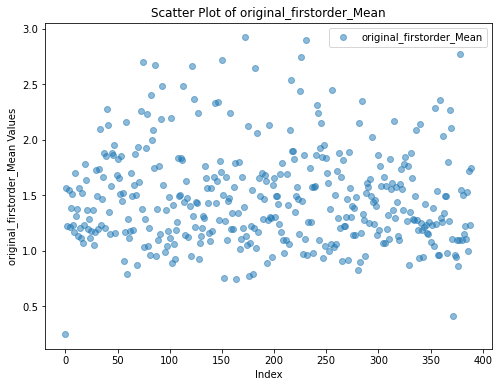

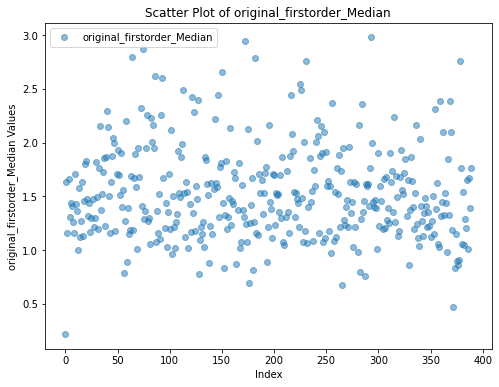

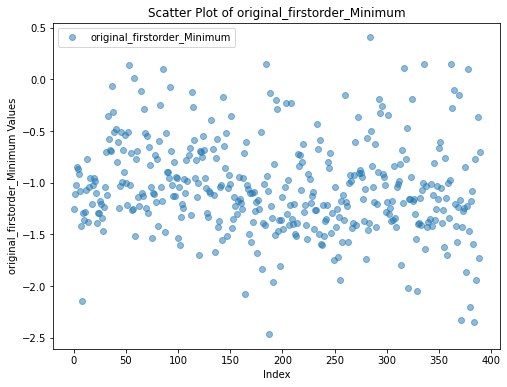

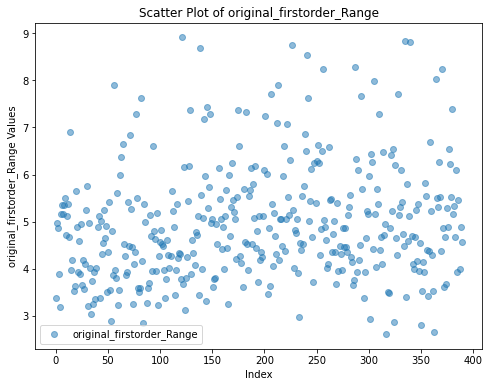

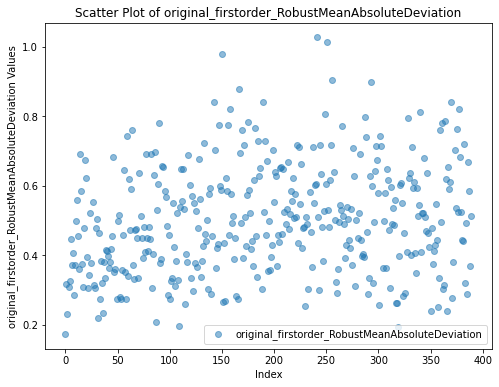

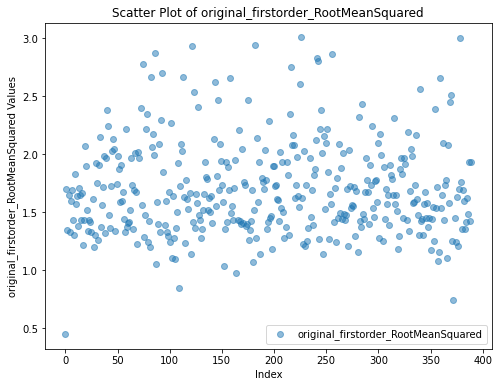

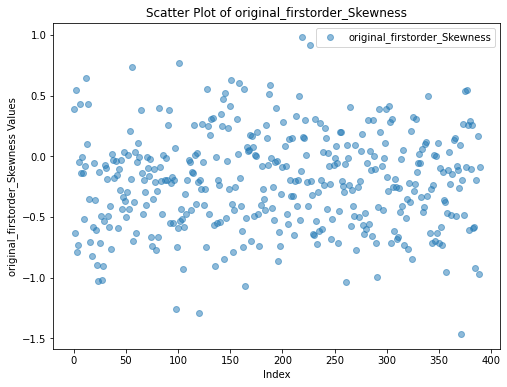

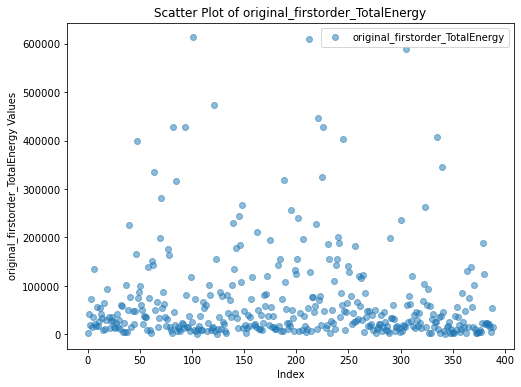

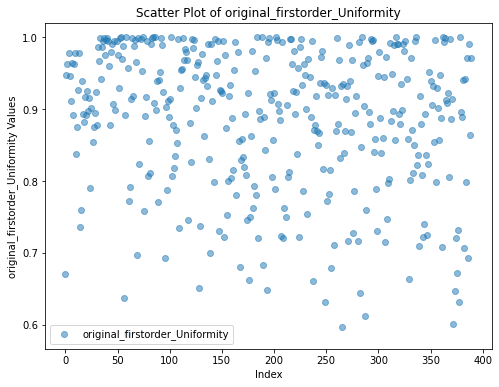

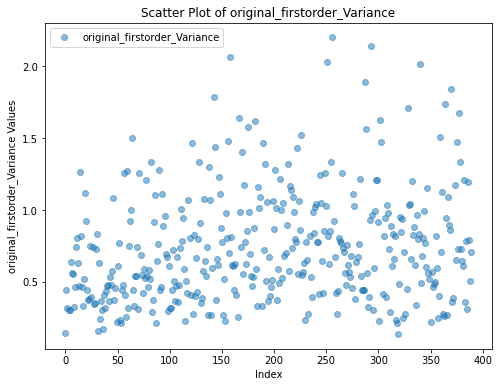

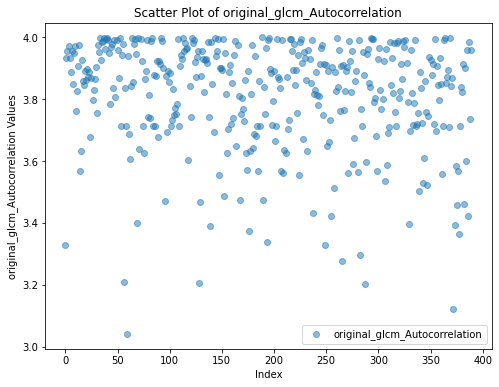

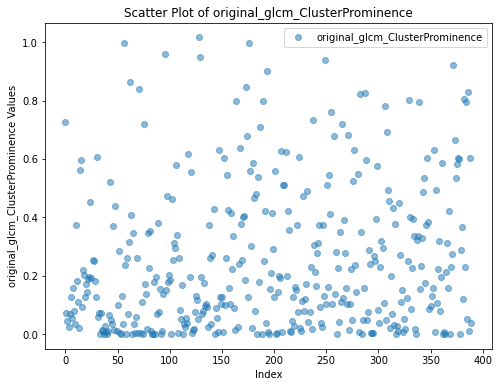

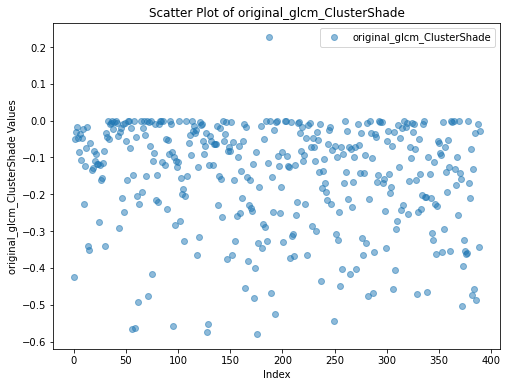

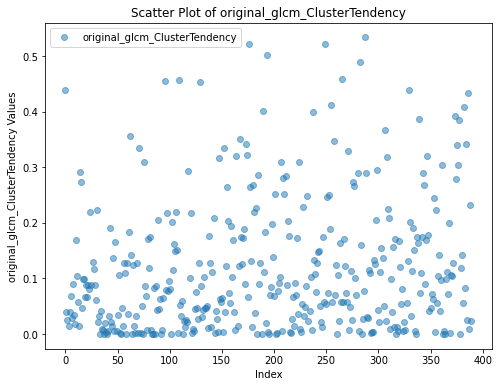

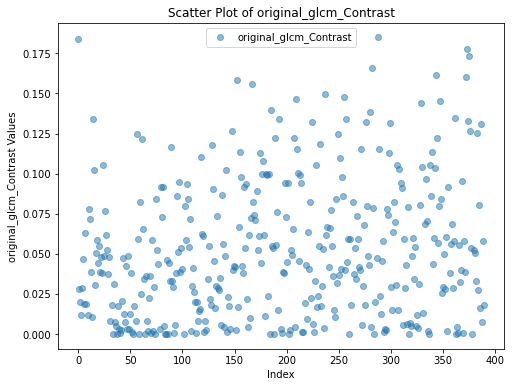

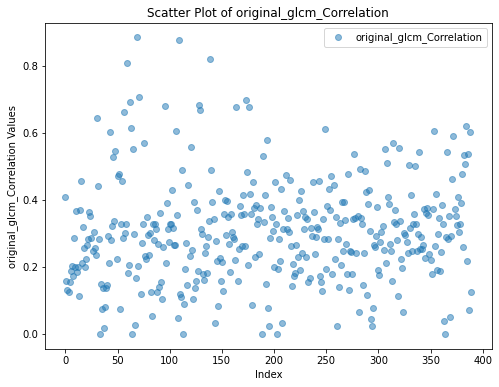

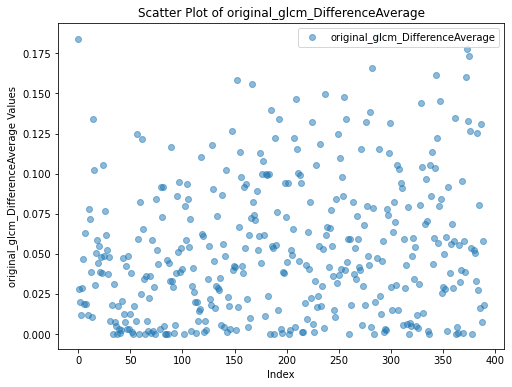

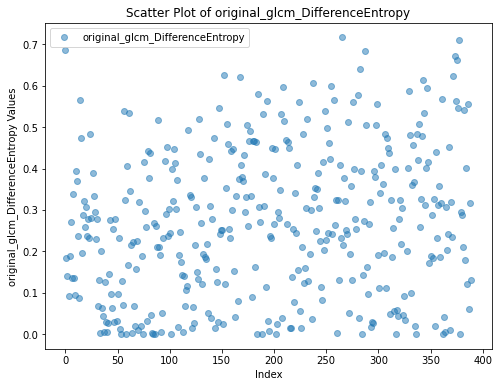

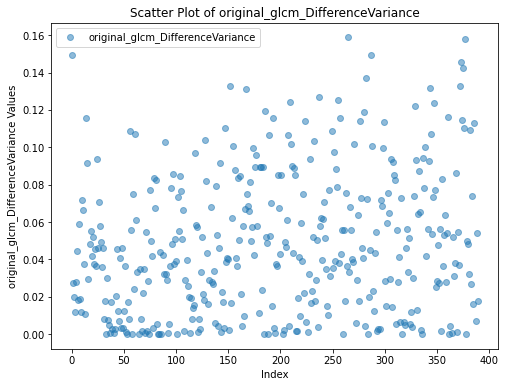

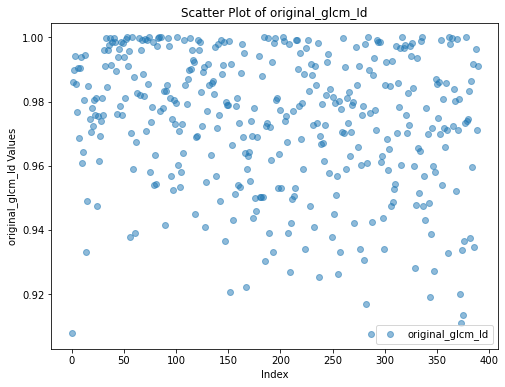

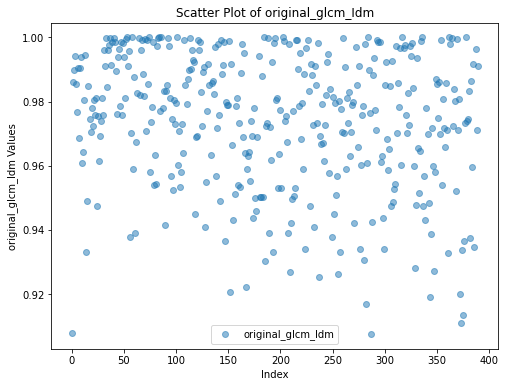

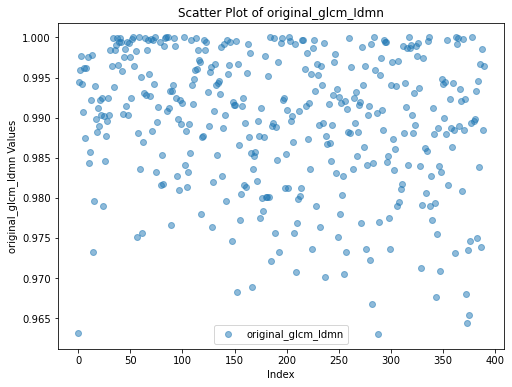

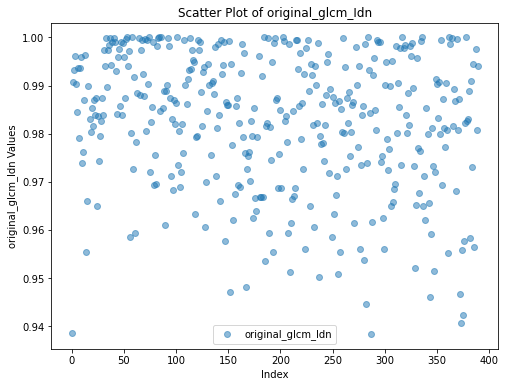

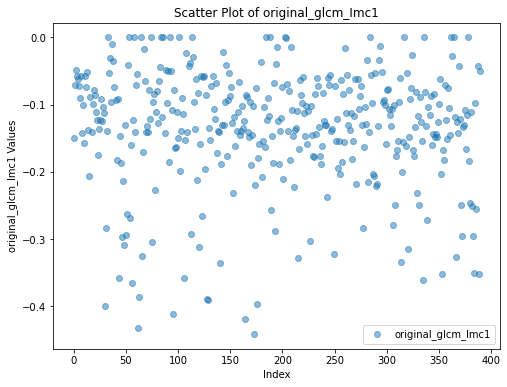

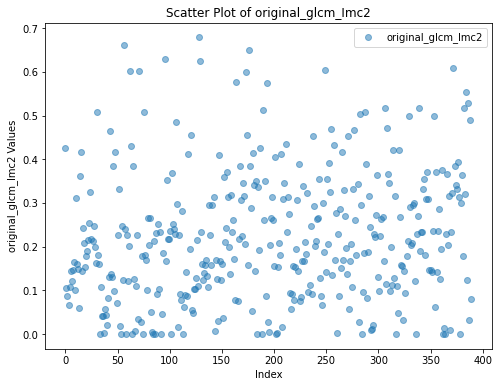

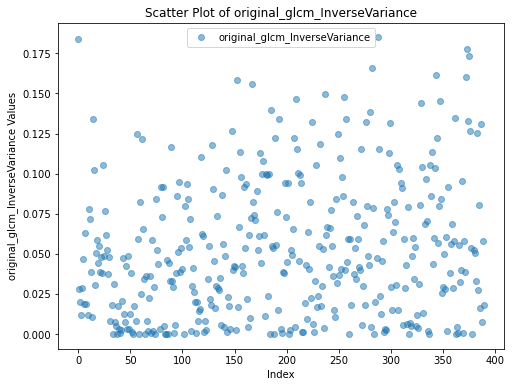

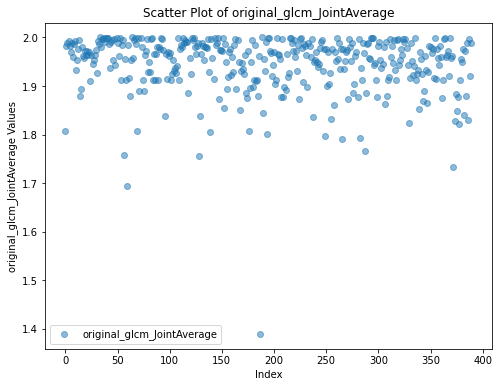

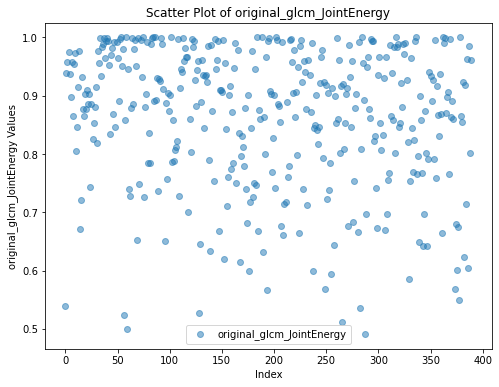

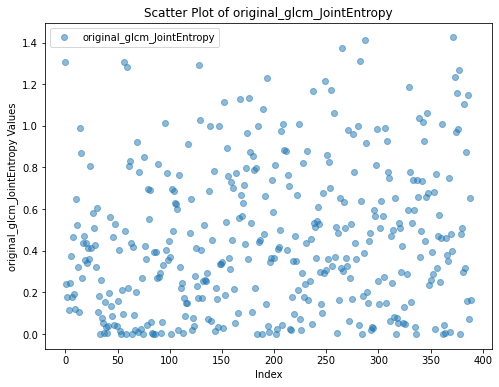

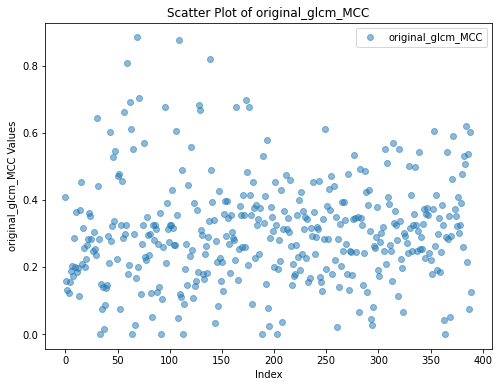

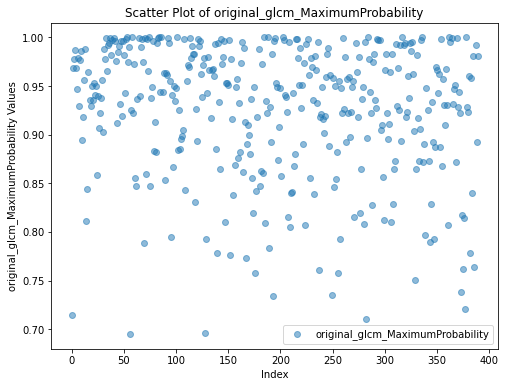

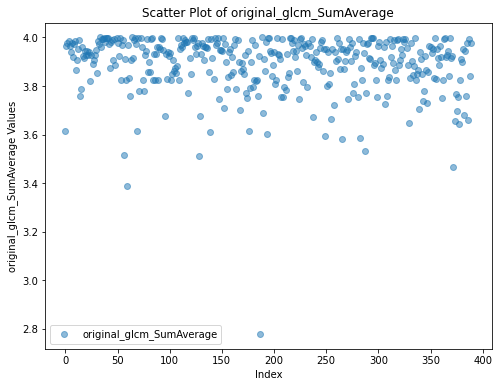

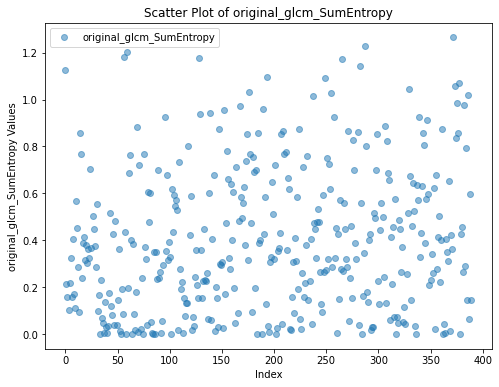

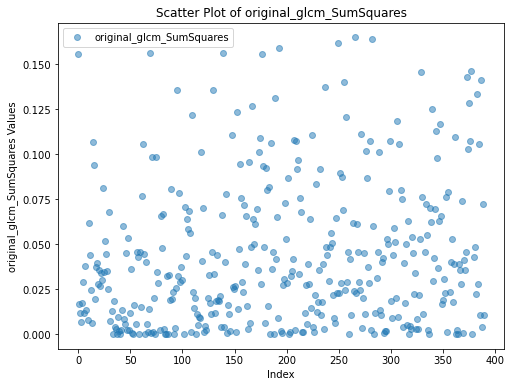

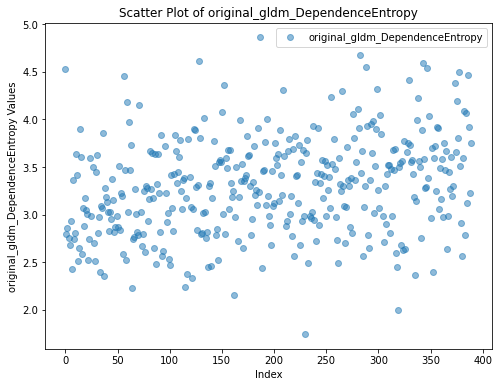

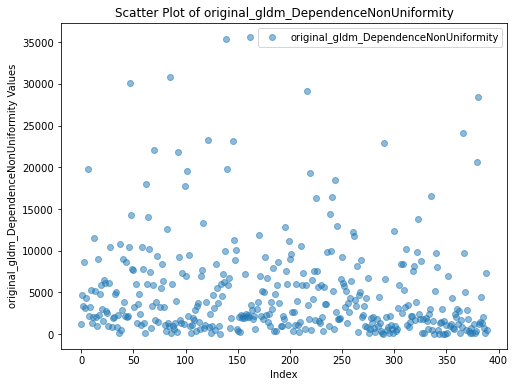

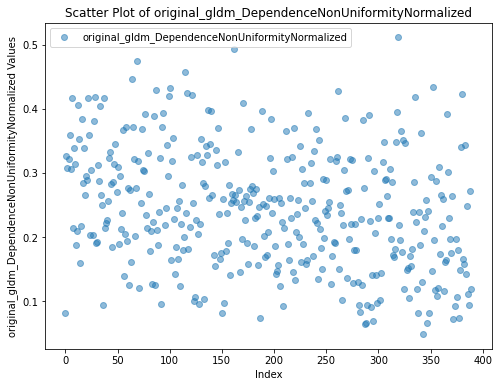

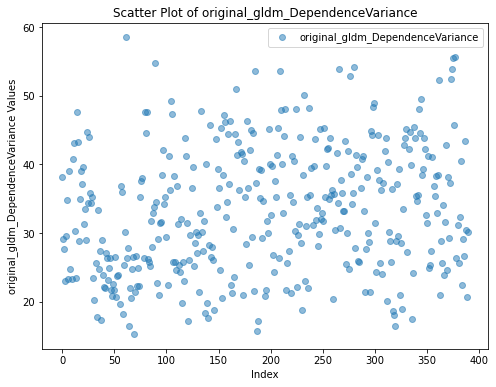

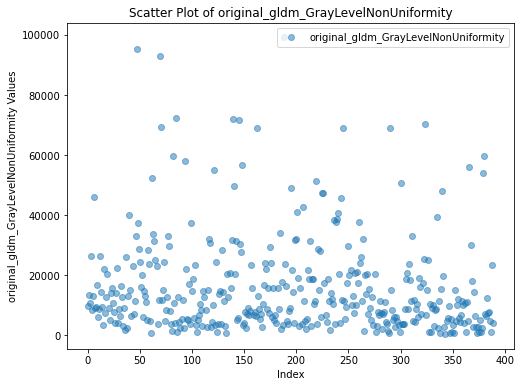

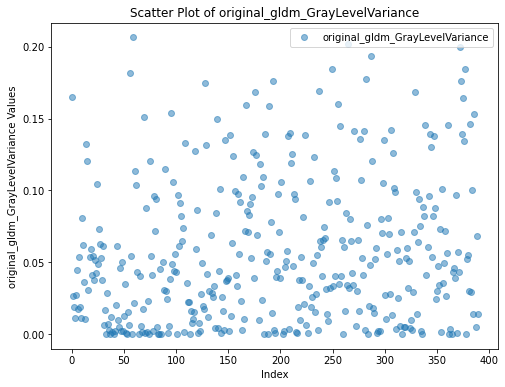

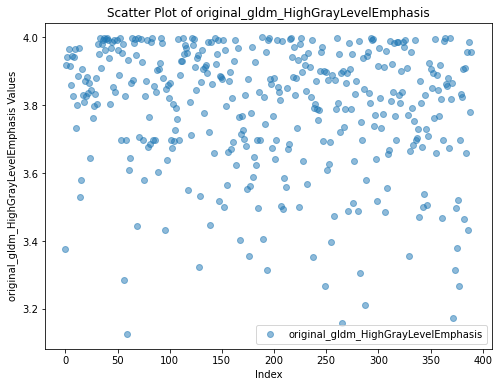

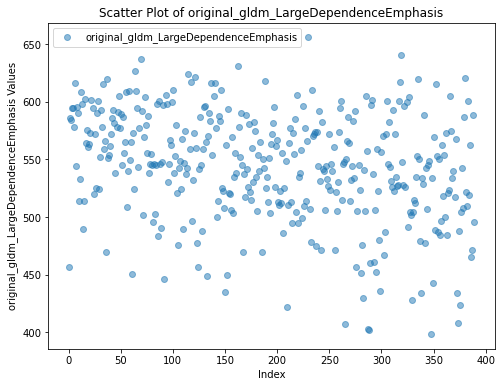

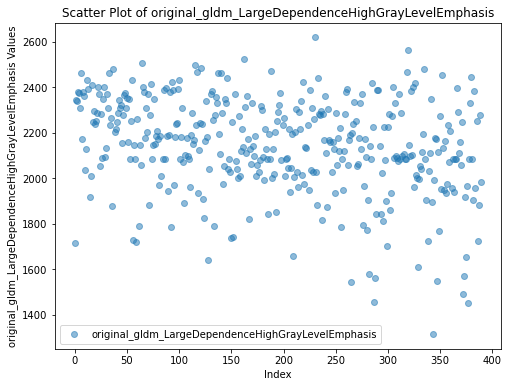

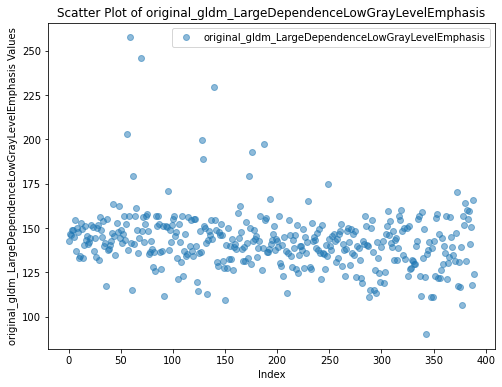

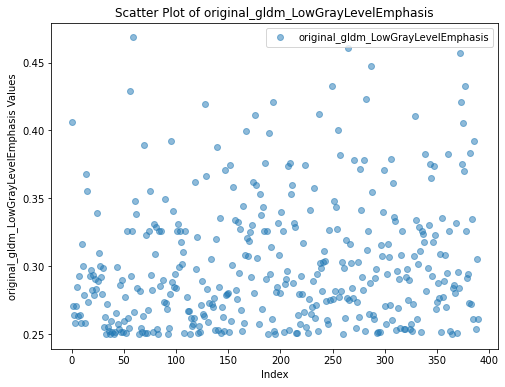

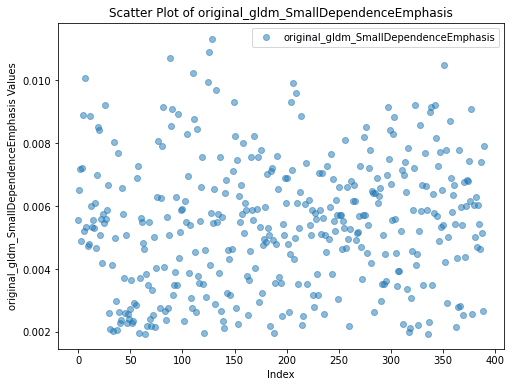

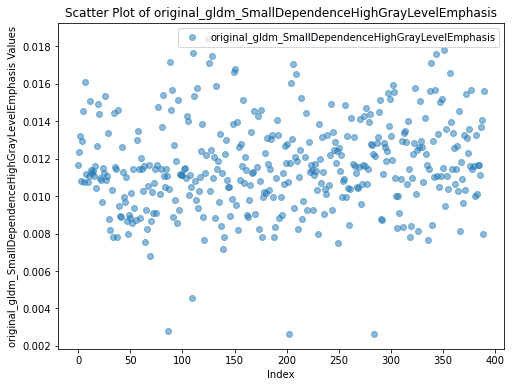

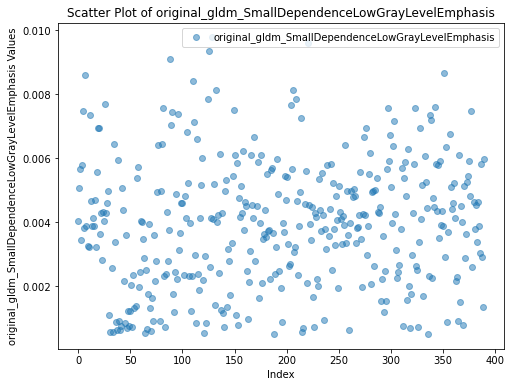

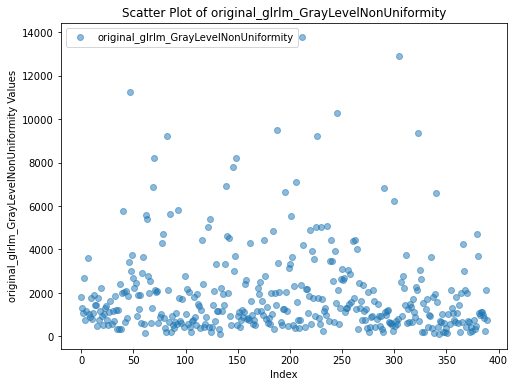

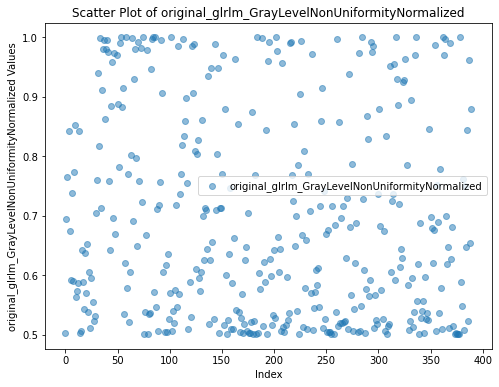

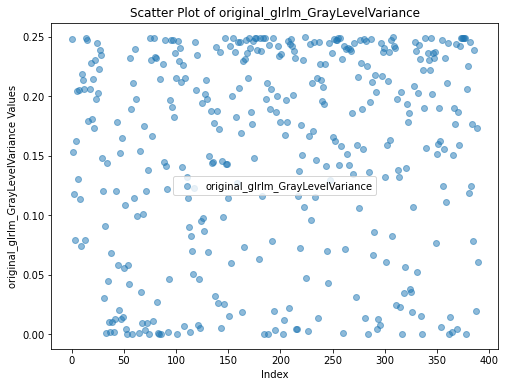

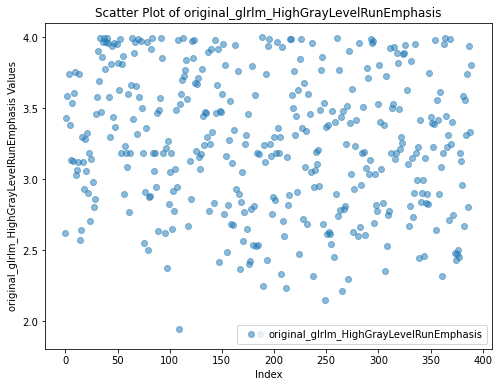

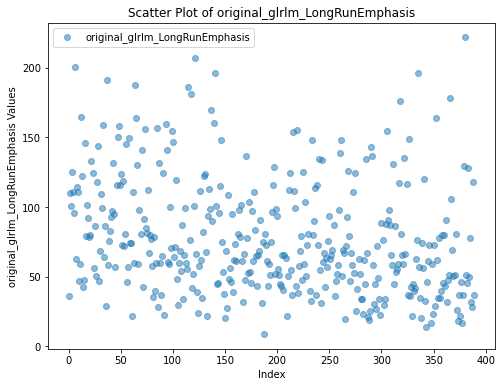

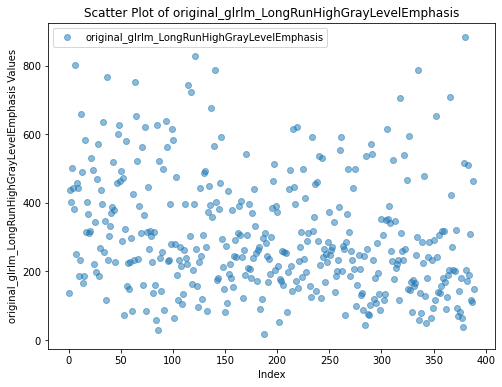

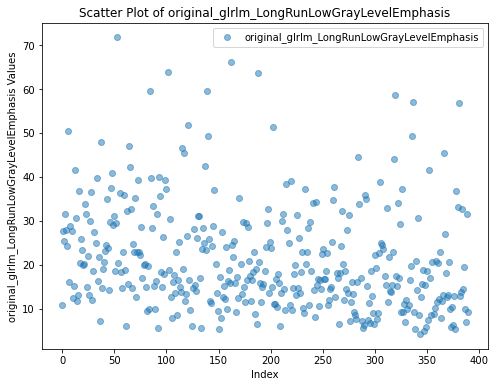

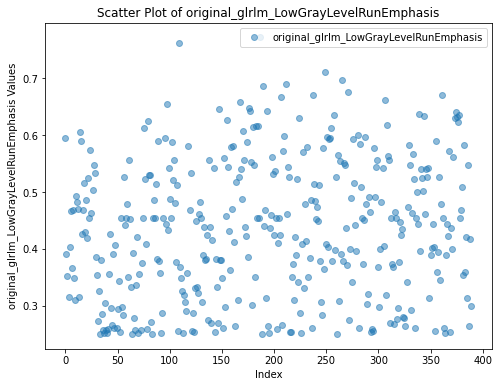

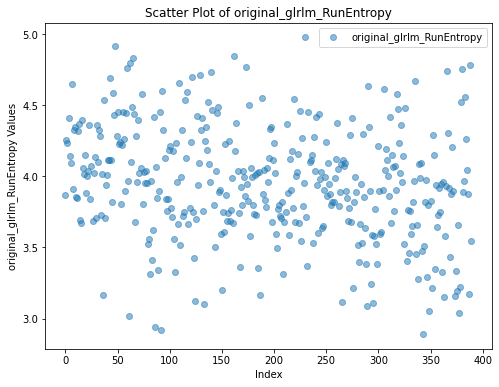

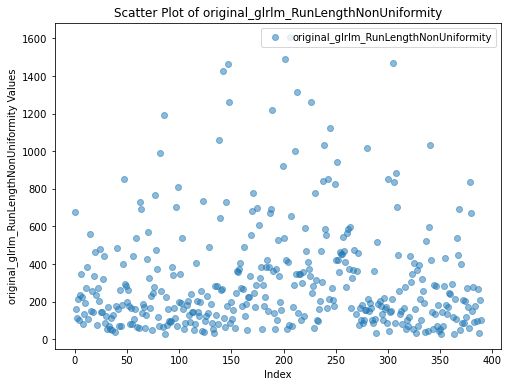

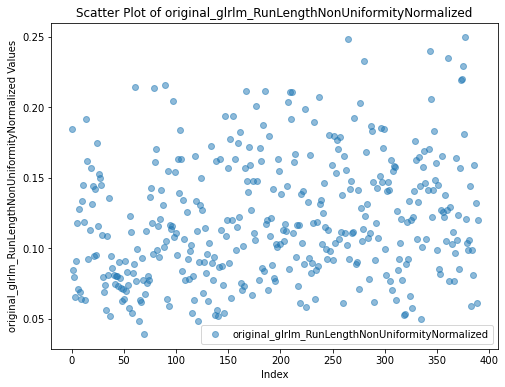

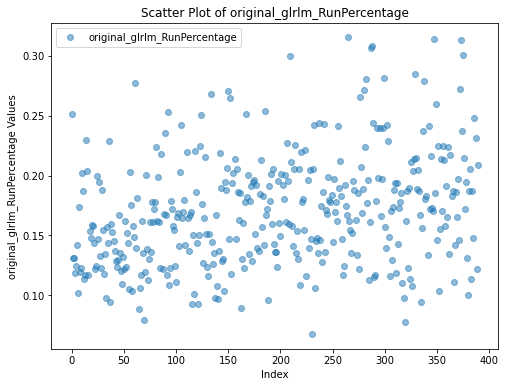

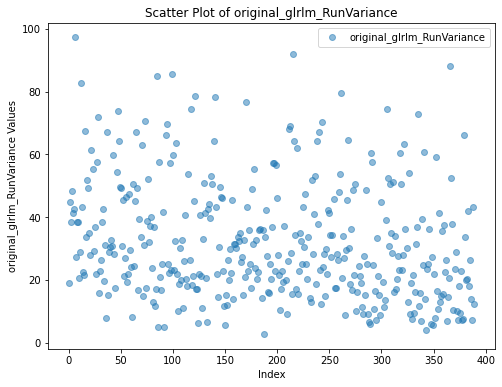

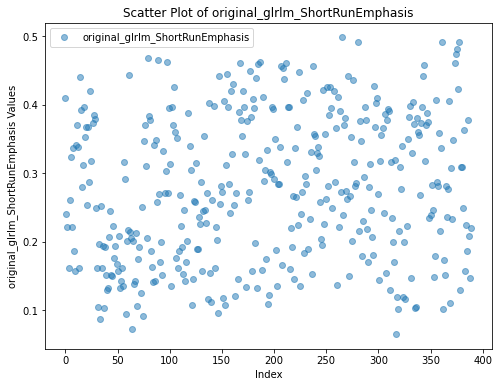

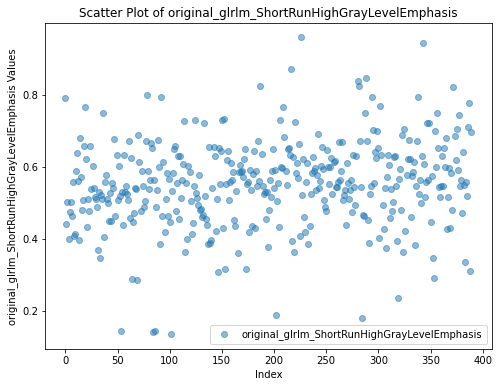

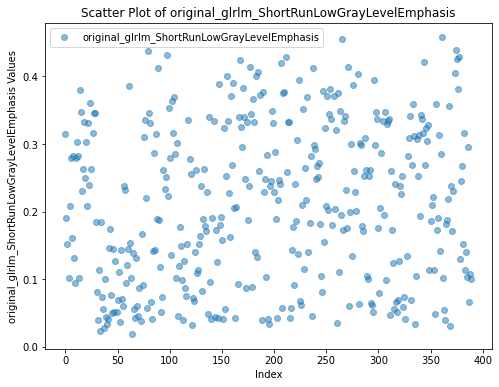

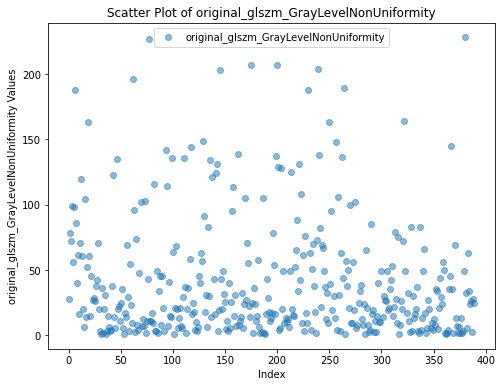

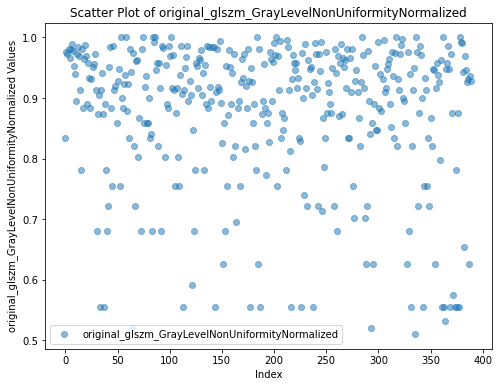

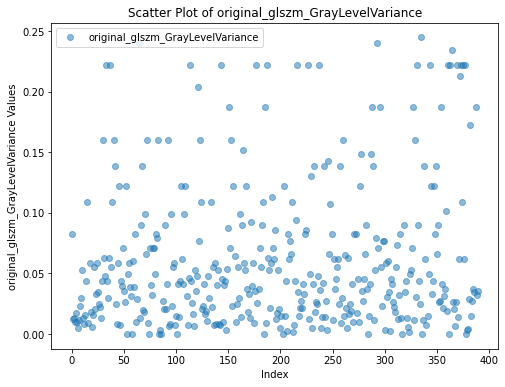

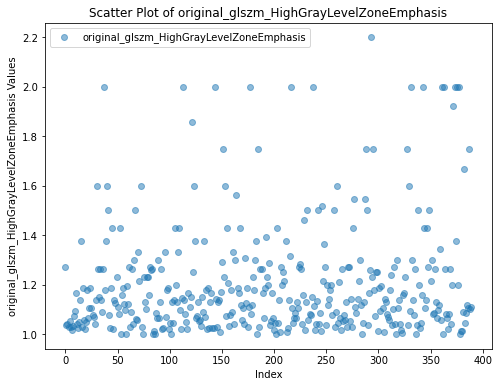

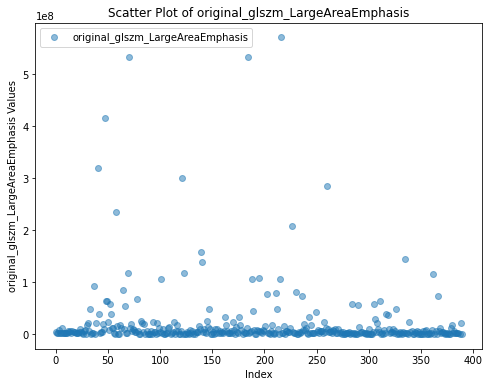

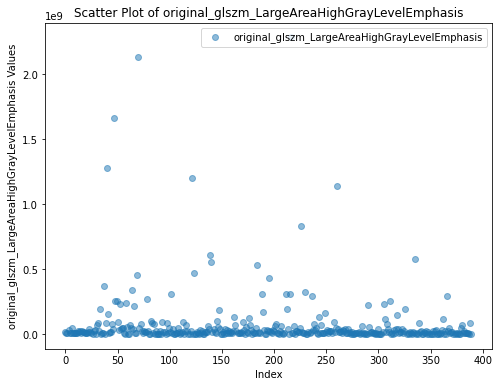

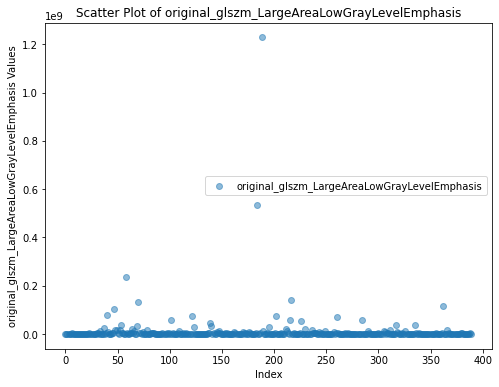

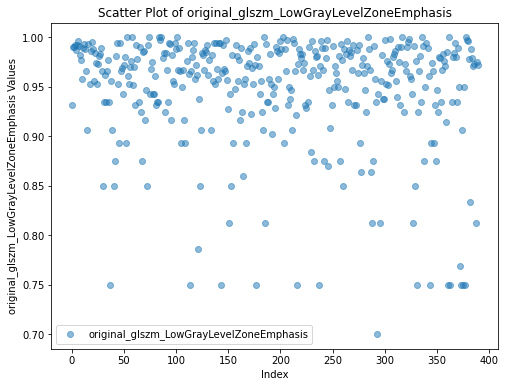

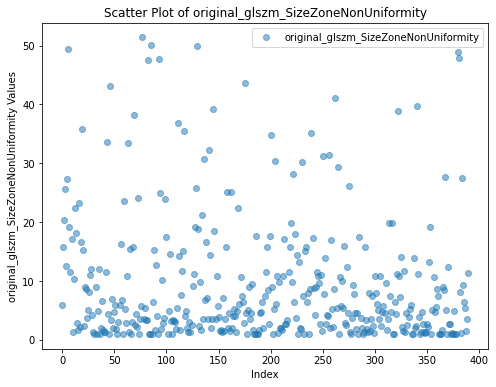

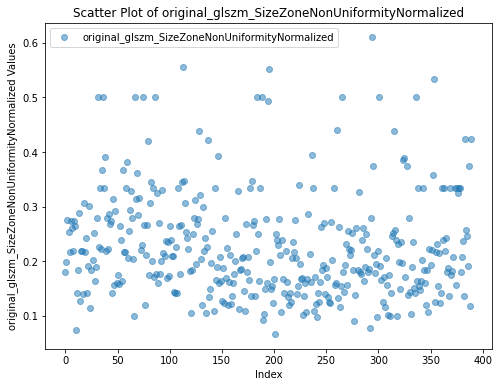

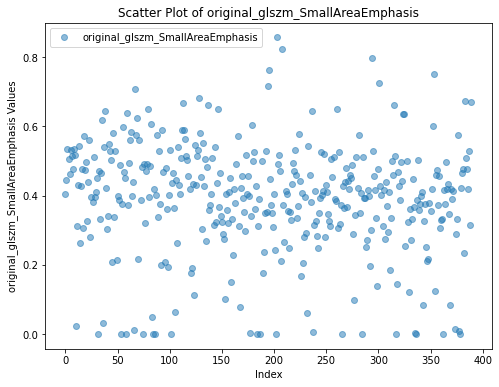

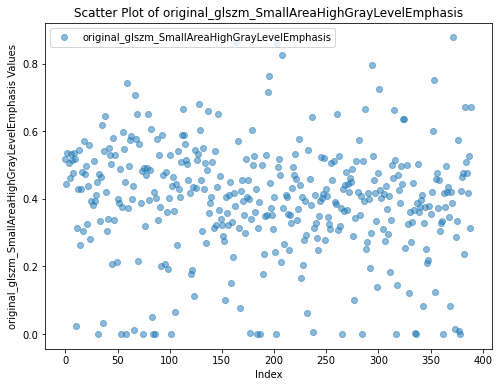

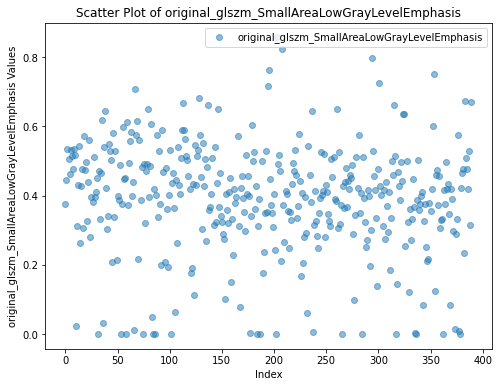

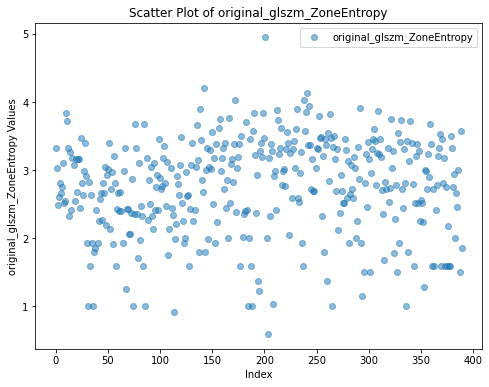

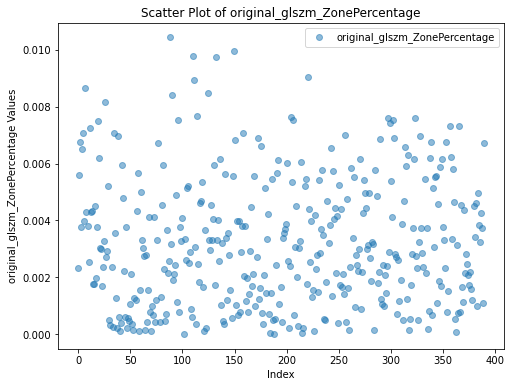

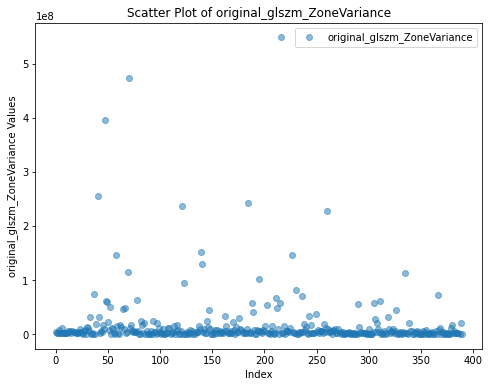

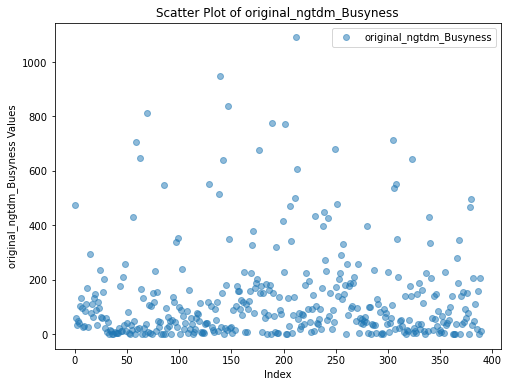

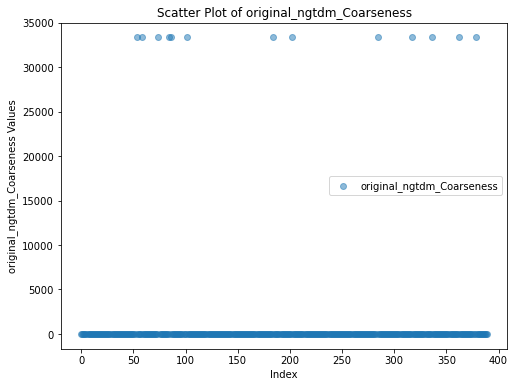

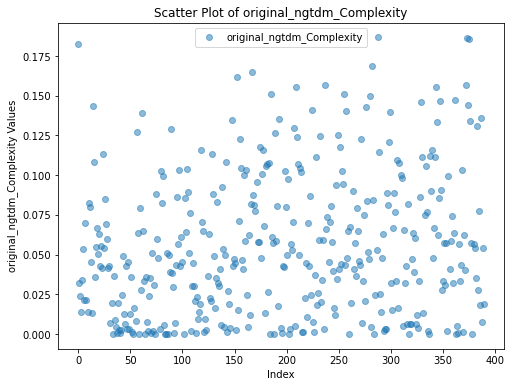

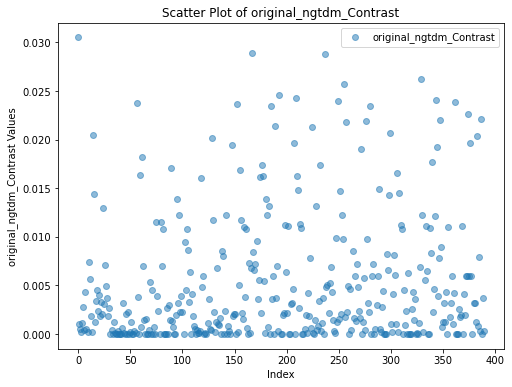

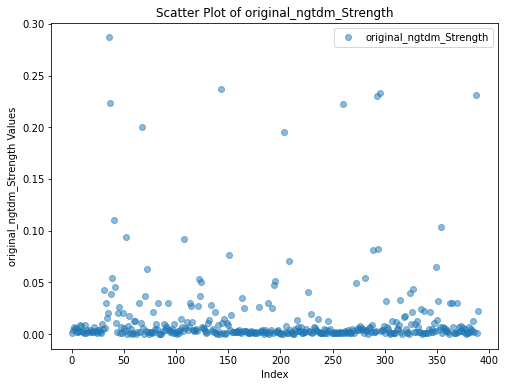

In [23]:
#Visualising to check if outliers have been removed from Xmri
plt.figure(figsize=(12, 8))

# Iterate through each column in the DataFrame
for column in Xmri_no_outliers.columns:
    plt.figure(figsize=(8, 6))  
    plt.scatter(Xmri_no_outliers.index, Xmri_no_outliers[column], label=column, alpha=0.5)
    plt.title(f'Scatter Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(f'{column} Values')
    plt.legend()
    plt.show()

## Min Max Normalisation on Xmri without outliers

In [24]:
scaler = MinMaxScaler()
Xmri1 = scaler.fit_transform(Xmri_no_outliers)
Xmri2 = pd.DataFrame(Xmri1, columns=Xmri_no_outliers.columns)
Xmri2

original_shape_Elongation  original_shape_Flatness  \
0                     0.750081                 0.807835   
1                     0.534722                 0.487408   
2                     0.504070                 0.640311   
3                     0.687321                 0.519793   
4                     0.818745                 0.841683   
..                         ...                      ...   
385                   0.131556                 0.222072   
386                   0.898319                 0.811094   
387                   0.521778                 0.449973   
388                   0.861354                 0.954371   
389                   0.241619                 0.384462   

     original_shape_LeastAxisLength  original_shape_MajorAxisLength  \
0                          0.391406                        0.170459   
1                          0.325796                        0.259629   
2                          0.346001                        0.200500   
3                          0.451498                        0.339487   
4                          0.320256                        0.123794   
..                              ...                             ...   
385                        0.181977                        0.327842   
386                        0.279758                        0.109431   
387                        0.062582                        0.053087   
388                        0.556576                        0.210375   
389                        0.195393                        0.204151   

     original_shape_Maximum2DDiameterColumn  \
0                                  0.241891   
1                                  0.377140   
2                                  0.197254   
3                                  0.518683   
4                                  0.199686   
..                                      ...   
385                                0.340403   
386                                0.178601   
387                                0.046915   
388                                0.283232   
389                                0.173361   

     original_shape_Maximum2DDiameterRow  \
0                               0.238984   
1                               0.268262   
2                               0.255993   
3                               0.297992   
4                               0.163965   
..                                   ...   
385                             0.096063   
386                             0.155443   
387                             0.033669   
388                             0.285975   
389                             0.147137   

     original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                 0.195081                          0.185230   
1                                 0.209814                          0.291043   
2                                 0.262013                          0.222294   
3                                 0.474885                          0.411889   
4                                 0.166021                          0.150339   
..                                     ...                               ...   
385                               0.388668                          0.328092   
386                               0.176396                          0.151764   
387                               0.052520                          0.069410   
388                               0.290194                          0.233477   
389                               0.157544                          0.187557   

     original_shape_MeshVolume  original_shape_MinorAxisLength  ...  \
0                     0.115969                        0.269232  ...   
1                     0.115911                        0.303725  ...   
2                     0.087575                        0.219660  ...   
3                     0.222209                        0.486671  ...   
4                     0.070529   

## Getting the clinical features

In [25]:
Xclinical=df1.iloc[:,2:12]
Xclinical

Age  ER  PgR  HER2  TrippleNegative  ChemoGrade  Proliferation  \
0     41   0    0     0                1           3              3   
1     39   1    1     0                0           3              3   
2     31   0    0     0                1           2              1   
3     35   0    0     0                1           3              3   
4     61   1    0     0                0           2              1   
..   ...  ..  ...   ...              ...         ...            ...   
385   58   1    0     1                0           3              2   
386   34   0    0     0                1           3              3   
387   53   0    0     0                1           2              1   
388   69   1    0     0                0           3              3   
389   46   1    0     0                0           2              1   

     HistologyType  LNStatus  TumourStage  
0                1         1            2  
1                1         1            2  
2                1         0            2  
3                1         1            3  
4                1         0            2  
..             ...       ...          ...  
385              1         1            4  
386              1         0            2  
387              1         0            2  
388              1         1            3  
389              1         1            2  

[390 rows x 10 columns]

<Figure size 864x576 with 0 Axes>

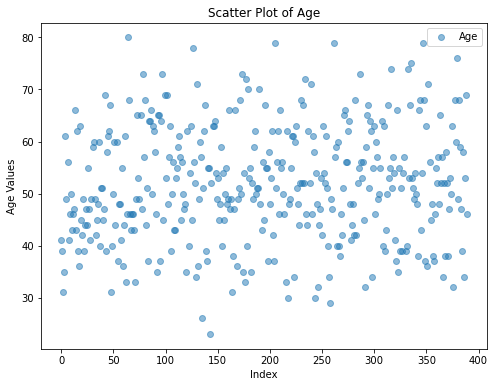

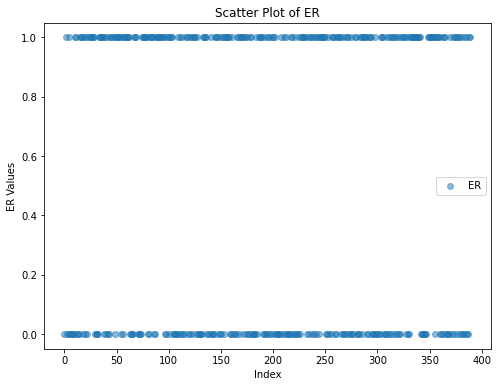

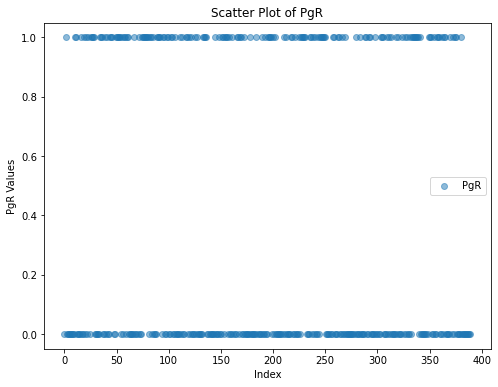

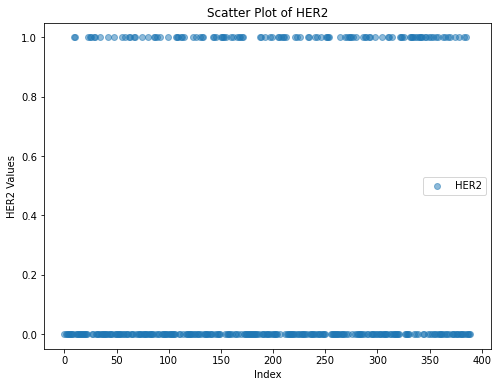

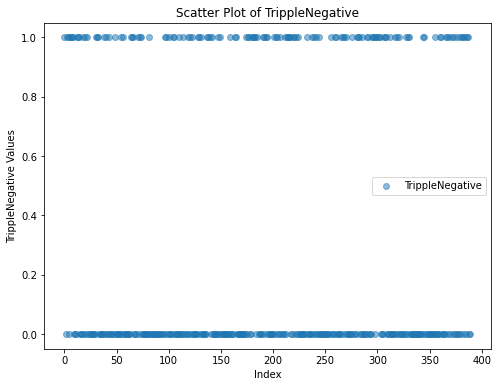

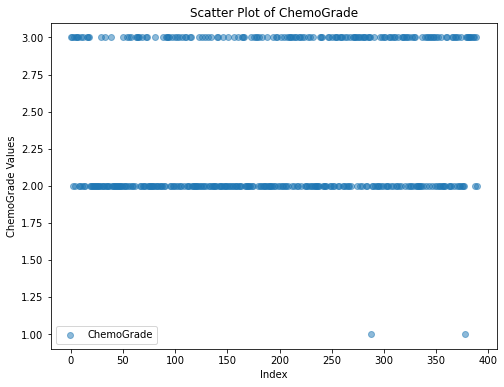

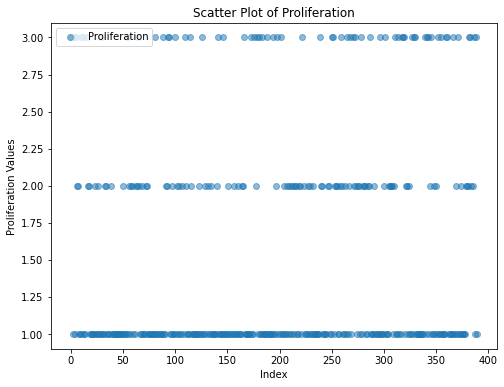

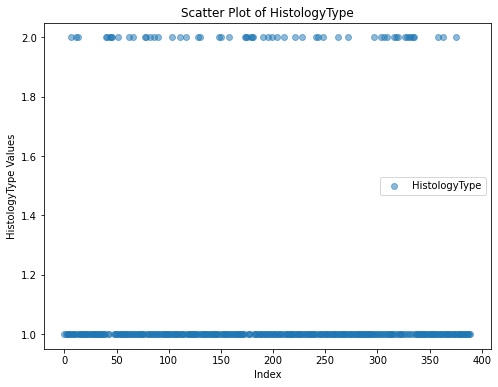

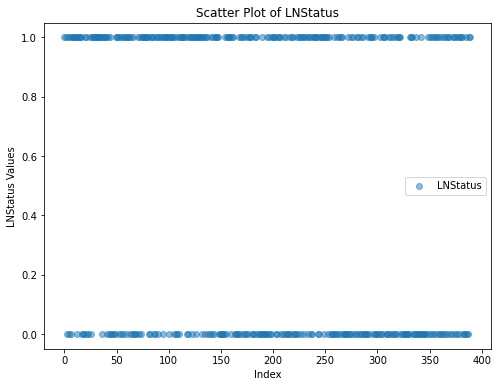

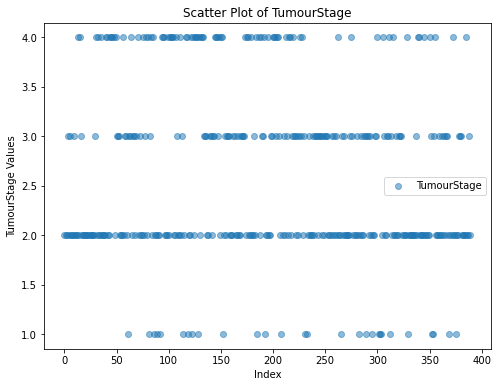

In [26]:
#Visualising to check if outliers exist in Xclinical
plt.figure(figsize=(12, 8))

# Iterate through each column in the DataFrame
for column in Xclinical.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(Xclinical.index, Xclinical[column], label=column, alpha=0.5)
    plt.title(f'Scatter Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(f'{column} Values')
    plt.legend()
    plt.show()

## Min Max Normalisation on Xclinical

In [27]:
Xclinical1 = scaler.fit_transform(Xclinical)
Xclinical2 = pd.DataFrame(Xclinical1, columns=Xclinical.columns)
Xclinical2

Age   ER  PgR  HER2  TrippleNegative  ChemoGrade  Proliferation  \
0    0.315789  0.0  0.0   0.0              1.0         1.0            1.0   
1    0.280702  1.0  1.0   0.0              0.0         1.0            1.0   
2    0.140351  0.0  0.0   0.0              1.0         0.5            0.0   
3    0.210526  0.0  0.0   0.0              1.0         1.0            1.0   
4    0.666667  1.0  0.0   0.0              0.0         0.5            0.0   
..        ...  ...  ...   ...              ...         ...            ...   
385  0.614035  1.0  0.0   1.0              0.0         1.0            0.5   
386  0.192982  0.0  0.0   0.0              1.0         1.0            1.0   
387  0.526316  0.0  0.0   0.0              1.0         0.5            0.0   
388  0.807018  1.0  0.0   0.0              0.0         1.0            1.0   
389  0.403509  1.0  0.0   0.0              0.0         0.5            0.0   

     HistologyType  LNStatus  TumourStage  
0              0.0       1.0     0.333333  
1              0.0       1.0     0.333333  
2              0.0       0.0     0.333333  
3              0.0       1.0     0.666667  
4              0.0       0.0     0.333333  
..             ...       ...          ...  
385            0.0       1.0     1.000000  
386            0.0       0.0     0.333333  
387            0.0       0.0     0.333333  
388            0.0       1.0     0.666667  
389            0.0       1.0     0.333333  

[390 rows x 10 columns]

<Figure size 864x576 with 0 Axes>

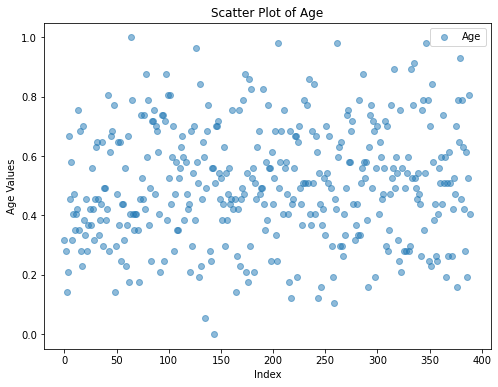

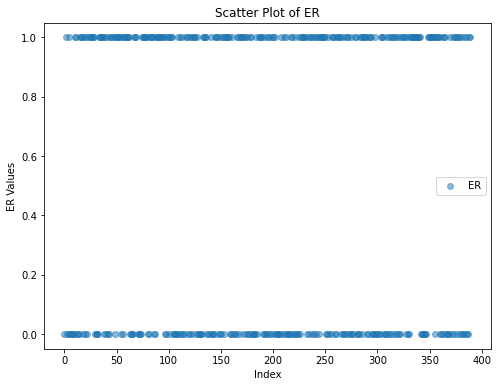

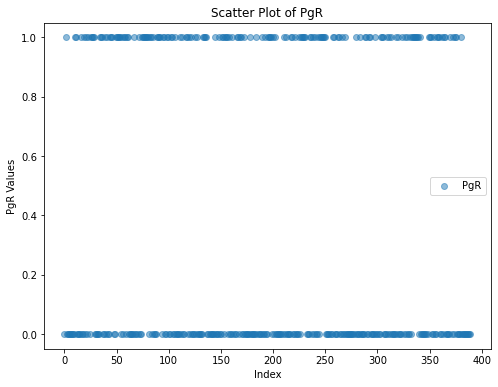

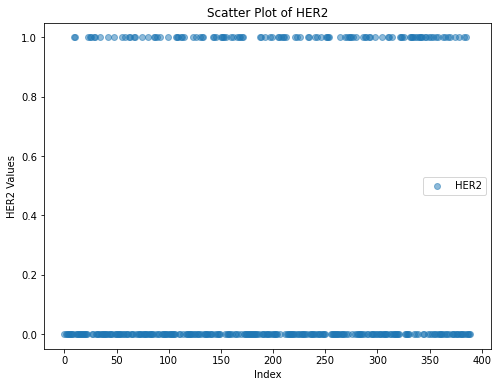

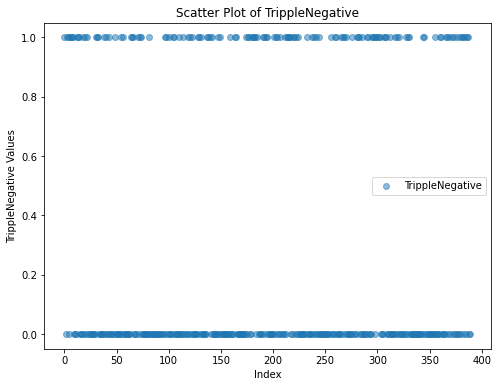

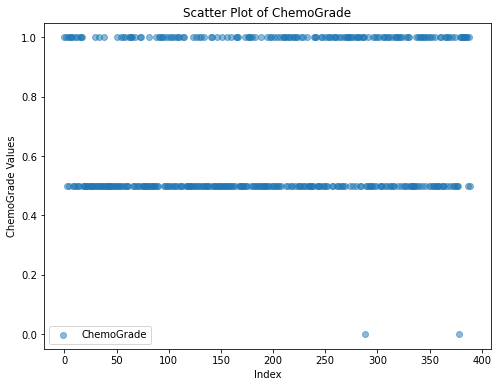

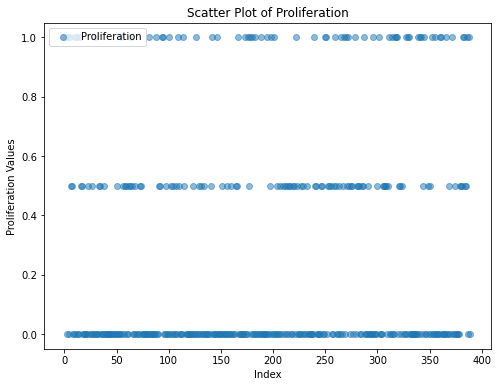

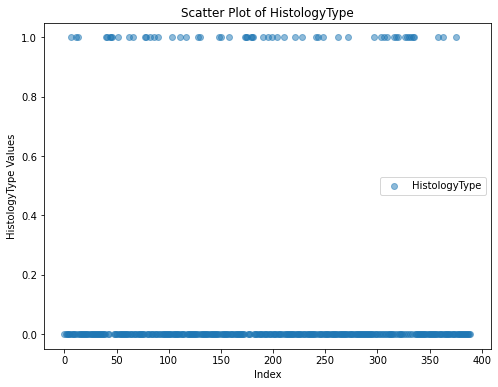

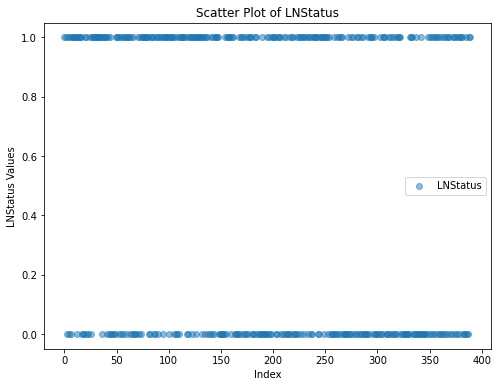

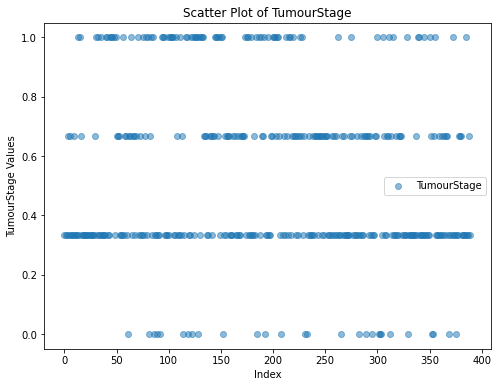

In [28]:
#Visualising Xclinical after normalising
plt.figure(figsize=(12, 8))

# Iterate through each column in the DataFrame
for column in Xclinical2.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(Xclinical2.index, Xclinical2[column], label=column, alpha=0.5)
    plt.title(f'Scatter Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(f'{column} Values')
    plt.legend()
    plt.show()

### Combining the MRI and Clinical features after normalisation

In [29]:
X_1=pd.concat([Xclinical2, Xmri2], axis=1)
X_1

Age   ER  PgR  HER2  TrippleNegative  ChemoGrade  Proliferation  \
0    0.315789  0.0  0.0   0.0              1.0         1.0            1.0   
1    0.280702  1.0  1.0   0.0              0.0         1.0            1.0   
2    0.140351  0.0  0.0   0.0              1.0         0.5            0.0   
3    0.210526  0.0  0.0   0.0              1.0         1.0            1.0   
4    0.666667  1.0  0.0   0.0              0.0         0.5            0.0   
..        ...  ...  ...   ...              ...         ...            ...   
385  0.614035  1.0  0.0   1.0              0.0         1.0            0.5   
386  0.192982  0.0  0.0   0.0              1.0         1.0            1.0   
387  0.526316  0.0  0.0   0.0              1.0         0.5            0.0   
388  0.807018  1.0  0.0   0.0              0.0         1.0            1.0   
389  0.403509  1.0  0.0   0.0              0.0         0.5            0.0   

     HistologyType  LNStatus  TumourStage  ...  \
0              0.0       1.0     0.333333  ...   
1              0.0       1.0     0.333333  ...   
2              0.0       0.0     0.333333  ...   
3              0.0       1.0     0.666667  ...   
4              0.0       0.0     0.333333  ...   
..             ...       ...          ...  ...   
385            0.0       1.0     1.000000  ...   
386            0.0       0.0     0.333333  ...   
387            0.0       0.0     0.333333  ...   
388            0.0       1.0     0.666667  ...   
389            0.0       1.0     0.333333  ...   

     original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                         0.589452   
1                                         0.506498   
2                                         0.609257   
3                                         0.576929   
4                                         0.526890   
..                                             ...   
385                                       0.543087   
386                                       0.476855   
387                                       0.601541   
388                                       0.357534   
389                                       0.763901   

     original_glszm_SmallAreaLowGrayLevelEmphasis  original_glszm_ZoneEntropy  \
0                                        0.437647                    0.627597   
1                                        0.518456                    0.560287   
2                                        0.623641                    0.434867   
3                                        0.590549                    0.462510   
4                                        0.539329                    0.509121   
..                                            ...                         ...   
385                                      0.555908                    0.427460   
386                                      0.488113                    0.551898   
387                                      0.615741                    0.208535   
388                                      0.365975                    0.684585   
389                                      0.781934                    0.290506   

     original_glszm_ZonePercentage  original_glszm_ZoneVariance  \
0                         0.221191                     0.007071   
1                         0.537708                     0.004322   
2                         0.647029                     0.002806   
3                         0.359465                     0.012639   
4                         0.624906                     0.002306   
..                             ...                          ...   
385                       0.308979                     0.004240   
386                       0.406315                     0.001831   
387                       0.356882                     0.000388   
388                       0.105932                     0.036588   
389                       0.642672                     0.001022   

     original_ngtdm_Busyness  original_ngtdm_Coarseness  

### a)PCA with 10 n_components (specifying the number of principal components to retain)

In [30]:
pca1 = PCA(n_components=10) 
X_pca1 = pca1.fit_transform(X_1)
X_pca1.shape

(390, 10)

### Turning PCA algorithm output to dataframe

In [31]:
pca_df1 = pd.DataFrame(X_pca1)
pca_df1

0         1         2         3         4         5         6  \
0    3.298505  0.761585 -0.088831 -0.259491  0.703679 -0.495715  0.316046   
1   -0.899743 -0.174896  0.272142 -0.874019 -0.283767 -0.687422  0.029217   
2   -0.847215  1.058841 -0.624624 -0.261871 -0.791297 -0.012477 -0.520378   
3   -1.400216  1.437917 -0.032585 -0.220476 -0.243808 -0.624165  0.271845   
4   -0.615357  0.085699 -0.305784 -0.991987 -0.664025  0.109941 -0.378470   
..        ...       ...       ...       ...       ...       ...       ...   
385 -1.317618 -0.206342 -0.379460 -0.369652 -0.096565  0.076242  0.855120   
386  2.857209  0.720267 -0.207689  0.359364 -0.004255  0.135130 -0.340746   
387 -0.992778  0.241593 -2.142382  1.011626  0.027880  0.064332 -0.572125   
388  0.185863  0.574018  0.679457 -0.971142  0.881758 -0.108262  0.317576   
389 -1.055799 -0.611778 -0.860561  0.372345 -0.608616 -0.597238 -0.007070   

            7         8         9  
0    0.383156  0.403876  0.092760  
1    0.809604 -0.100635  0.039818  
2   -0.427542 -0.065710 -0.117950  
3    0.372552  0.087354  0.045069  
4   -0.311471 -0.065562 -0.057663  
..        ...       ...       ...  
385  0.344606  0.328068  0.420454  
386  0.616173  0.140166  0.456389  
387 -0.085662  0.202295 -0.518564  
388  0.464884  0.455515  0.658516  
389  0.033084  0.626261  0.328339  

[390 rows x 10 columns]

### b)PCA with 0.95 n_components (to capture at least 95% of the total variance in the original data)

In [55]:
#pca2 = PCA(n_components=0.95)
#X_pca2 = pca2.fit_transform(X_1)
#X_pca2.shape

pca = PCA(n_components = 0.95) 

X_pca2 = pca.fit_transform(X_1)

In [56]:
with open('/Users/matt/Desktop/Pcamodel_pickle.pkl','wb') as f:
    pickle.dump(pca,f)

### Turning PCA algorithm output to dataframe

In [34]:
pca_df2 = pd.DataFrame(X_pca2)
pca_df2

0         1         2         3         4         5         6   \
0    3.298505  0.761585 -0.088831 -0.259491  0.703679 -0.495715  0.316046   
1   -0.899743 -0.174896  0.272142 -0.874019 -0.283767 -0.687422  0.029217   
2   -0.847215  1.058841 -0.624624 -0.261871 -0.791297 -0.012477 -0.520378   
3   -1.400216  1.437917 -0.032585 -0.220476 -0.243808 -0.624165  0.271845   
4   -0.615357  0.085699 -0.305784 -0.991987 -0.664025  0.109941 -0.378470   
..        ...       ...       ...       ...       ...       ...       ...   
385 -1.317618 -0.206342 -0.379460 -0.369652 -0.096565  0.076242  0.855120   
386  2.857209  0.720267 -0.207689  0.359364 -0.004255  0.135130 -0.340746   
387 -0.992778  0.241593 -2.142382  1.011626  0.027880  0.064332 -0.572125   
388  0.185863  0.574018  0.679457 -0.971142  0.881758 -0.108262  0.317576   
389 -1.055799 -0.611778 -0.860561  0.372345 -0.608616 -0.597238 -0.007070   

           7         8         9   ...        13        14        15  \
0    0.383156  0.403876  0.092760  ...  0.087834 -0.256148  0.538797   
1    0.809604 -0.100635  0.039818  ...  0.122349 -0.272399  0.034090   
2   -0.427542 -0.065710 -0.117950  ...  0.287615 -0.080255  0.219331   
3    0.372552  0.087354  0.045069  ... -0.101211 -0.073654  0.201260   
4   -0.311471 -0.065562 -0.057663  ...  0.653491  0.266359 -0.231406   
..        ...       ...       ...  ...       ...       ...       ...   
385  0.344606  0.328068  0.420454  ...  0.410489  0.391495  0.501301   
386  0.616173  0.140166  0.456389  ... -0.249804 -0.061642 -0.225985   
387 -0.085662  0.202295 -0.518564  ...  0.013058  0.016389  0.029494   
388  0.464884  0.455515  0.658516  ...  0.366747  0.271237 -0.614518   
389  0.033084  0.626261  0.328339  ...  0.475317 -0.049316  0.125389   

           16        17        18        19        20        21        22  
0    0.254068 -0.300052  0.035195 -0.609871 -0.188904 -0.198496 -0.085415  
1    0.184723 -0.012163  0.059208 -0.081705  0.022945  0.137536 -0.217416  
2    0.313483  0.163182 -0.169584 -0.220225 -0.262331  0.113927 -0.323682  
3    0.104802  0.107420 -0.002507 -0.187264  0.248250 -0.137194 -0.082729  
4   -0.005977 -0.109236  0.087650 -0.111299  0.029215  0.030025  0.068191  
..        ...       ...       ...       ...       ...       ...       ...  
385 -0.154081 -0.045879 -0.213062  0.076806 -0.115313 -0.230457  0.120978  
386 -0.006247 -0.239819 -0.120311 -0.035676  0.200988 -0.024505 -0.121473  
387 -0.043332  0.205171  0.026650  0.137121 -0.064054 -0.033651  0.176897  
388 -0.105101 -0.315198  0.079385 -0.033604 -0.126821 -0.133639  0.182994  
389 -0.209647 -0.157400 -0.044095  0.158286 -0.002424  0.098912 -0.095749  

[390 rows x 23 columns]

## Creating X and y dataframes
### Append target dataframe on to pca dataframe
#### Getting target values

In [35]:
target_df = df1.iloc[:,:2]
target_df

pCR (outcome)  RelapseFreeSurvival (outcome)
0                1                            144
1                0                            142
2                1                            135
3                0                             12
4                0                            109
..             ...                            ...
385              0                             54
386              0                             49
387              0                             48
388              0                             48
389              0                             47

[390 rows x 2 columns]

#### adding target values to both pca dataframes

In [36]:
processed_df1 = pd.concat([target_df, pca_df1.set_axis(target_df.index)], axis=1)
processed_df2 = pd.concat([target_df, pca_df2.set_axis(target_df.index)], axis=1)
processed_df1

pCR (outcome)  RelapseFreeSurvival (outcome)         0         1  \
0                1                            144  3.298505  0.761585   
1                0                            142 -0.899743 -0.174896   
2                1                            135 -0.847215  1.058841   
3                0                             12 -1.400216  1.437917   
4                0                            109 -0.615357  0.085699   
..             ...                            ...       ...       ...   
385              0                             54 -1.317618 -0.206342   
386              0                             49  2.857209  0.720267   
387              0                             48 -0.992778  0.241593   
388              0                             48  0.185863  0.574018   
389              0                             47 -1.055799 -0.611778   

            2         3         4         5         6         7         8  \
0   -0.088831 -0.259491  0.703679 -0.495715  0.316046  0.383156  0.403876   
1    0.272142 -0.874019 -0.283767 -0.687422  0.029217  0.809604 -0.100635   
2   -0.624624 -0.261871 -0.791297 -0.012477 -0.520378 -0.427542 -0.065710   
3   -0.032585 -0.220476 -0.243808 -0.624165  0.271845  0.372552  0.087354   
4   -0.305784 -0.991987 -0.664025  0.109941 -0.378470 -0.311471 -0.065562   
..        ...       ...       ...       ...       ...       ...       ...   
385 -0.379460 -0.369652 -0.096565  0.076242  0.855120  0.344606  0.328068   
386 -0.207689  0.359364 -0.004255  0.135130 -0.340746  0.616173  0.140166   
387 -2.142382  1.011626  0.027880  0.064332 -0.572125 -0.085662  0.202295   
388  0.679457 -0.971142  0.881758 -0.108262  0.317576  0.464884  0.455515   
389 -0.860561  0.372345 -0.608616 -0.597238 -0.007070  0.033084  0.626261   

            9  
0    0.092760  
1    0.039818  
2   -0.117950  
3    0.045069  
4   -0.057663  
..        ...  
385  0.420454  
386  0.456389  
387 -0.518564  
388  0.658516  
389  0.328339  

[390 rows x 12 columns]

In [37]:
processed_df2

pCR (outcome)  RelapseFreeSurvival (outcome)         0         1  \
0                1                            144  3.298505  0.761585   
1                0                            142 -0.899743 -0.174896   
2                1                            135 -0.847215  1.058841   
3                0                             12 -1.400216  1.437917   
4                0                            109 -0.615357  0.085699   
..             ...                            ...       ...       ...   
385              0                             54 -1.317618 -0.206342   
386              0                             49  2.857209  0.720267   
387              0                             48 -0.992778  0.241593   
388              0                             48  0.185863  0.574018   
389              0                             47 -1.055799 -0.611778   

            2         3         4         5         6         7  ...  \
0   -0.088831 -0.259491  0.703679 -0.495715  0.316046  0.383156  ...   
1    0.272142 -0.874019 -0.283767 -0.687422  0.029217  0.809604  ...   
2   -0.624624 -0.261871 -0.791297 -0.012477 -0.520378 -0.427542  ...   
3   -0.032585 -0.220476 -0.243808 -0.624165  0.271845  0.372552  ...   
4   -0.305784 -0.991987 -0.664025  0.109941 -0.378470 -0.311471  ...   
..        ...       ...       ...       ...       ...       ...  ...   
385 -0.379460 -0.369652 -0.096565  0.076242  0.855120  0.344606  ...   
386 -0.207689  0.359364 -0.004255  0.135130 -0.340746  0.616173  ...   
387 -2.142382  1.011626  0.027880  0.064332 -0.572125 -0.085662  ...   
388  0.679457 -0.971142  0.881758 -0.108262  0.317576  0.464884  ...   
389 -0.860561  0.372345 -0.608616 -0.597238 -0.007070  0.033084  ...   

           13        14        15        16        17        18        19  \
0    0.087834 -0.256148  0.538797  0.254068 -0.300052  0.035195 -0.609871   
1    0.122349 -0.272399  0.034090  0.184723 -0.012163  0.059208 -0.081705   
2    0.287615 -0.080255  0.219331  0.313483  0.163182 -0.169584 -0.220225   
3   -0.101211 -0.073654  0.201260  0.104802  0.107420 -0.002507 -0.187264   
4    0.653491  0.266359 -0.231406 -0.005977 -0.109236  0.087650 -0.111299   
..        ...       ...       ...       ...       ...       ...       ...   
385  0.410489  0.391495  0.501301 -0.154081 -0.045879 -0.213062  0.076806   
386 -0.249804 -0.061642 -0.225985 -0.006247 -0.239819 -0.120311 -0.035676   
387  0.013058  0.016389  0.029494 -0.043332  0.205171  0.026650  0.137121   
388  0.366747  0.271237 -0.614518 -0.105101 -0.315198  0.079385 -0.033604   
389  0.475317 -0.049316  0.125389 -0.209647 -0.157400 -0.044095  0.158286   

           20        21        22  
0   -0.188904 -0.198496 -0.085415  
1    0.022945  0.137536 -0.217416  
2   -0.262331  0.113927 -0.323682  
3    0.248250 -0.137194 -0.082729  
4    0.029215  0.030025  0.068191  
..        ...       ...       ...  
385 -0.115313 -0.230457  0.120978  
386  0.200988 -0.024505 -0.121473  
387 -0.064054 -0.033651  0.176897  
388 -0.126821 -0.133639  0.182994  
389 -0.002424  0.098912 -0.095749  

[390 rows x 25 columns]

### setting x and y values, x being PCA output and Y being the target values 

In [38]:

X_b = pca_df2
y = target_df['RelapseFreeSurvival (outcome)']

## Train test split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold



In [41]:
from sklearn.model_selection import GridSearchCV
#hyper parameter tuning linear regression model 
model = LinearRegression()

param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive': [True, False]}

reg = GridSearchCV(model,param_grid, cv=5, return_train_score=False, scoring='neg_mean_squared_error')
reg.fit(X_train, y_train)
reg.best_score_
reg.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [42]:
#linear regression model
reg = LinearRegression(copy_X=True, fit_intercept = True, positive= False)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('mean squared error:%.2f' % mean_squared_error(y_test,y_pred))
print('mean absolute error:%.2f' % mean_absolute_error(y_test,y_pred))

mean squared error:942.60
mean absolute error:24.96


In [43]:
from sklearn.svm import SVR


In [44]:
#hyper parameter tuning svr model for regression 
from sklearn.model_selection import GridSearchCV
model = SVR()

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
}

reg = GridSearchCV(model,param_grid, cv=5, return_train_score=False, scoring='neg_mean_squared_error')
reg.fit(X_train, y_train)
reg.best_score_
reg.best_params_

{'C': 1, 'epsilon': 0.1, 'kernel': 'sigmoid'}

In [45]:
# SVR model for regrssion 
svr = SVR(C= 1, epsilon= 0.1, kernel='sigmoid')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('mean squared error:%.2f' % mean_squared_error(y_test,y_pred))
print('mean absolute error:%.2f' % mean_absolute_error(y_test,y_pred))

mean squared error:969.77
mean absolute error:24.58


In [46]:
#hyper parameter tuning random forest for regression 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [23, 50, 100],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2']
}

reg = GridSearchCV(model,param_grid, cv=5, return_train_score=False, scoring='neg_mean_squared_error')
reg.fit(X_train, y_train)
reg.best_score_
reg.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 23}

In [47]:
#random forest model for regression 

regressor = RandomForestRegressor(n_estimators=23,max_depth=None,max_features='log2',min_samples_leaf=1,min_samples_split=2,criterion='friedman_mse')
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print('mean squared error:%.2f' % mean_squared_error(y_test,y_pred))
print('mean absolute error:%.2f' % mean_absolute_error(y_test,y_pred))

mean squared error:882.44
mean absolute error:23.27


In [48]:
#hyper parameter truning deep nueral network
from keras.models import Sequential 
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


def define_model(optimizer='adam', neurons=32):
    model = Sequential()
    model.add(Dense(neurons, input_dim=23, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error',optimizer=optimizer, metrics=['mse'])
    return model

keras_regressor = KerasRegressor(build_fn=define_model, epochs=10, batch_size=32, verbose=1)

param_grid = {
    'optimizer': ['adam', 'sgd'],
    'neurons': [32, 64, 128]
}

grid_search = GridSearchCV(estimator=keras_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_result = grid_search.fit(X_train, y_train)



2023-12-14 18:28:41.689413: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10


/var/folders/jt/l6vb49ld2m5fdmm0xf1hs_t00000gn/T/ipykernel_48555/2417856896.py:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=define_model, epochs=10, batch_size=32, verbose=1)
2023-12-14 18:28:47.020430: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


8/8 [==============================] - 1s 2ms/step - loss: 3778.8826 - mse: 3778.8826
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 3757.5940 - mse: 3757.5940
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 3733.6846 - mse: 3733.6846
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: 3707.5913 - mse: 3707.5913
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 3675.0874 - mse: 3675.0874
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 3636.9438 - mse: 3636.9438
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 3590.6885 - mse: 3590.6885
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 3535.1497 - mse: 3535.1497
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 3467.3118 - mse: 3467.3118
Epoch 10/10
2/2 [==============================] - 0s 2ms/step
Epoch 1/10
8/8 [==============================] - 1s 2ms/step - loss: 3688.

8/8 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 10/10
2/2 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklear

8/8 [==============================] - 0s 1ms/step - loss: 8889.1562 - mse: 8889.1562
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 3636.7473 - mse: 3636.7473
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 2006683.2500 - mse: 2006683.2500
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan                                
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 10/10
2/2 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklear

8/8 [==============================] - 0s 1ms/step - loss: 6006.5405 - mse: 6006.5405
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 1131946341186089779200.0000 - mse: 1131946341186089779200.0000
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 543559000713592832.0000 - mse: 543559000713592832.0000
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: 393426769614471168.0000 - mse: 393426769614471168.0000
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 284761468505686016.0000 - mse: 284761468505686016.0000
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 206109673739255808.0000 - mse: 206109673739255808.0000
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: 149181703296909312.0000 - mse: 149181703296909312.0000
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 107977367607050240.0000 - mse: 107977367607050240.0000
Epoch 9/10
8/8 [===============

2/2 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklear

8/8 [==============================] - 0s 1ms/step - loss: 5754.3291 - mse: 5754.3291
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 56284.8203 - mse: 56284.8203
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 666761822208.0000 - mse: 666761822208.0000
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: nan - mse: nan                    
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 10/10
2/2 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklear

8/8 [==============================] - 0s 1ms/step - loss: 7783.9077 - mse: 7783.9077
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan            
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 10/10
2/2 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklear

8/8 [==============================] - 0s 1ms/step - loss: 6982.6201 - mse: 6982.6201
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 35416.3984 - mse: 35416.3984
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 1204.9303 - mse: 1204.9303
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: 920.4081 - mse: 920.4081
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 855.9144 - mse: 855.9144
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 756.6883 - mse: 756.6883
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: 747.6487 - mse: 747.6487
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 1109.3767 - mse: 1109.3767
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 1010.5330 - mse: 1010.5330
Epoch 10/10
2/2 [==============================] - 0s 2ms/step
Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 15504.1787 

/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklear

8/8 [==============================] - 1s 2ms/step - loss: 3768.8523 - mse: 3768.8523
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 3662.4995 - mse: 3662.4995
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 3536.4182 - mse: 3536.4182
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: 3371.0659 - mse: 3371.0659
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 3159.1550 - mse: 3159.1550
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 2896.6899 - mse: 2896.6899
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: 2575.9111 - mse: 2575.9111
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 2202.9734 - mse: 2202.9734
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 1814.0907 - mse: 1814.0907
Epoch 10/10
2/2 [==============================] - 0s 2ms/step
Epoch 1/10
8/8 [==============================] - 1s 1ms/step - loss: 3596.

/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklear

8/8 [==============================] - 1s 1ms/step - loss: 14337.6221 - mse: 14337.6221
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 4086.5930 - mse: 4086.5930
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan          
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 10/10
2/2 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklear

8/8 [==============================] - 0s 1ms/step - loss: 11491.2773 - mse: 11491.2773
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 5117.4399 - mse: 5117.4399
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 5831.0391 - mse: 5831.0391
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 1534.6348 - mse: 1534.6348
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 1433.1095 - mse: 1433.1095
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 78333.8984 - mse: 78333.8984
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan        
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 10/10
2/2 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklear

8/8 [==============================] - 0s 1ms/step - loss: 26767.6875 - mse: 26767.6875
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 500190720.0000 - mse: 500190752.0000
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan                                    
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 10/10
2/2 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklear

8/8 [==============================] - 0s 1ms/step - loss: 15958587.0000 - mse: 15958587.0000
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan                                      
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 10/10
2/2 [==============================] - 0s 2ms/step
Epoch 1/10


/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/matt/opt/anaconda3/lib/python3.9/site-packages/sklear

10/10 [==============================] - 1s 1ms/step - loss: 3651.0505 - mse: 3651.0505
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 3513.2131 - mse: 3513.2131
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 3331.8735 - mse: 3331.8735
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 3079.6440 - mse: 3079.6440
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 2764.3979 - mse: 2764.3979
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 2366.8606 - mse: 2366.8606
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 1933.1638 - mse: 1933.1638
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 1488.0032 - mse: 1488.0032
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 1088.1210 - mse: 1088.1210
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 821.5168 - mse: 821.5168


In [49]:
grid_result.best_score_
grid_result.best_params_

{'neurons': 128, 'optimizer': 'adam'}

## Applying Alogrithms

In [50]:
#deep neural network for regression 
from keras.models import Sequential 
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
    
model = Sequential()
model.add(Dense(128, input_dim=23, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mse'])
model.summary()
    
history = model.fit(X_train, y_train, validation_split=0.2, epochs = 100)

    
mse_neural, mae_neural = model.evaluate(X_test,y_test)
print('mean squared error:%.2f' % mse_neural)
print('mean absolute error:%.2f' % mae_neural)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 128)               3072      
                                                                 
 dense_94 (Dense)            (None, 128)               16512     
                                                                 
 dense_95 (Dense)            (None, 1)                 129       
                                                                 
Total params: 19,713
Trainable params: 19,713
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 23ms/step - loss: 3709.0945 - mse: 3709.0945 - val_loss: 3492.4973 - val_mse: 3492.4973
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 3598.5146 - mse: 3598.5146 - val_loss: 3378.0798 - val_mse: 3378.0798
Epoch 3/100
8/8 [=============

8/8 [==============================] - 0s 4ms/step - loss: 393.0033 - mse: 393.0033 - val_loss: 764.6000 - val_mse: 764.6000
Epoch 55/100
8/8 [==============================] - 0s 4ms/step - loss: 389.3173 - mse: 389.3173 - val_loss: 764.8768 - val_mse: 764.8768
Epoch 56/100
8/8 [==============================] - 0s 5ms/step - loss: 387.0583 - mse: 387.0583 - val_loss: 764.9611 - val_mse: 764.9611
Epoch 57/100
8/8 [==============================] - 0s 4ms/step - loss: 384.3939 - mse: 384.3939 - val_loss: 765.4462 - val_mse: 765.4462
Epoch 58/100
8/8 [==============================] - 0s 4ms/step - loss: 381.5850 - mse: 381.5850 - val_loss: 764.4340 - val_mse: 764.4340
Epoch 59/100
8/8 [==============================] - 0s 4ms/step - loss: 378.4072 - mse: 378.4072 - val_loss: 767.6841 - val_mse: 767.6841
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 376.3043 - mse: 376.3043 - val_loss: 766.6286 - val_mse: 766.6286
Epoch 61/100
8/8 [=============================

In [51]:

import pickle
pickle.dump(regressor, open('/Users/matt/Desktop/reg.pkl', 'wb'))


In [52]:
from sklearn.ensemble import VotingRegressor




vr = VotingRegressor([('reg2',regressor),('reg3',svr),('reg4',reg)])
vr.fit(X_train, y_train)

y_pred = vr.predict(X_test)
print('mean squared error:%.2f' % mean_squared_error(y_test,y_pred))
print('mean absolute error:%.2f' % mean_absolute_error(y_test,y_pred))

mean squared error:937.80
mean absolute error:24.04
